# Scratch : House Pricing Challenge

> $ Group$ $ 3:  $ 
* $ ARRIAU$ $Emma$
* $ GUIGA $ $ Chloé $
* $ LUSCAN$ $ Pierre$
* $ MOSCHINI$ $ Irina$

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Remarks : 
- In each section, we imported the data latest version as it was loaded into the Drive to make everyone of us able to access it. 

# I . DATA CLEANING

---


## 1. Data Importation 

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data_train = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/train.csv', delimiter=',')
data_test = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/test.csv', delimiter=',')

In [0]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,...,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2005.0,Fin,2,400,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,176000
1196,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,...,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
1197,1198,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,815,815,GasA,...,Y,SBrkr,815,875,0,1690,0,0,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1916.0,Unf,1,225,TA,TA,Y,0,0,330,0,0,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000
1198,1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1212,1212,GasA,..

We will work both on the **training** and the **testing** data sets.
- Let us merge the two data sets

In [0]:
train_test = pd.concat([data_train,data_test],ignore_index=True)
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
train_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

Remark : We will keep the "ID" column in order to be sure to identified well the rows (and make the merge of all our work easier)

## 2. Validity of the data

Now, we will test that the type of each data for each feature corresponds to its theoretical type

### 2.1. MSSubClass

In [0]:
MSSubClass_type=[20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]

In [0]:
MSSubClass_test=pd.DataFrame(train['MSSubClass'].isin(MSSubClass_type))

In [0]:
MSSubClass_test[MSSubClass_test['MSSubClass']==False].count()

MSSubClass    0
dtype: int64

All the values of MSSubClass have the good type.

### 2.2 MSZoning

In [0]:
MSZoning_type=['A','C','FV','I','RH','RL','RP','RM']

In [0]:
MSZoning_test=pd.DataFrame(train['MSZoning'].isin(MSZoning_type))

In [0]:
MSZoning_test[MSZoning_test['MSZoning']==False].count()

MSZoning    9
dtype: int64

9 samples have a strange type... We will display it and solve the problem.


In [0]:
MSZoning_test[MSZoning_test['MSZoning']==False]

,MSZoning
30,False
88,False
93,False
495,False
557,False
711,False
812,False
916,False
1061,False


In [0]:
train.loc[{30,88,93,495,557,711,812,916,1061},'MSZoning']

1061    C (all)
711     C (all)
812     C (all)
557     C (all)
495     C (all)
916     C (all)
88      C (all)
93      C (all)
30      C (all)
Name: MSZoning, dtype: object

We see that for all of them, it's a problem of format (C (all) instead of C). 
So we update: C (all) for C.

In [0]:
#train.at[{30,93,88,916,495,557,812,711,1061},'MSZoning']='C'
MSZoning_type_corrected=['A','C (all)','FV','I','RH','RL','RP','RM']

In [0]:
MSZoning_test_2=pd.DataFrame(train['MSZoning'].isin(MSZoning_type_corrected))

In [0]:
MSZoning_test_2[MSZoning_test_2['MSZoning']==False].count()

MSZoning    0
dtype: int64

In [0]:
#train.loc[{30,88,93,495,557,711,812,916,1061},'MSZoning']

Now, it's ok!

### 2.3. LotFrontage

In [0]:
count=0
for x in train['LotFrontage']:
  try:
    int(x)
  except ValueError:
    count+=1
    pass
    

print(count)

210


We have 210 NaN values but the others values respect an integer type !

### 2.4. LotArea

In [0]:
count=0
for x in train['LotArea']:
  try:
    int(x)
  except ValueError:
    count+=1
    pass
    

print(count)

0


No problem here, we have only integer values.

### 2.5. Street

In [0]:
Street_type=['Grvl','Pave']

In [0]:
Street_test=pd.DataFrame(train['Street'].isin(Street_type))

In [0]:
Street_test[Street_test['Street']==False].count()

Street    0
dtype: int64

No problem!

### 2.6. Alley

In [0]:
Alley_type=['Grvl','Pave','NA']

In [0]:
Alley_test=pd.DataFrame(train['Alley'].isin(Alley_type))

In [0]:
Alley_test[Alley_test['Alley']==False].count()

Alley    1125
dtype: int64

It detects only the NaN (no alley access) so no problems for the other data.

### 2.7. LotShape

In [0]:
LotShape_type=['Reg','IR1','IR2','IR3']

In [0]:
LotShape_test=pd.DataFrame(train['LotShape'].isin(LotShape_type))

In [0]:
LotShape_test[LotShape_test['LotShape']==False].count()

LotShape    0
dtype: int64

No problem!

### 2.8. From LandContour to BsmtExposure

In [0]:
LandContour_type=['Lvl','Bnk','HLS','Low']
Utilities_Type=['AllPub','NoSewr','NoSeWa','ELO']
LotConfig_Type=['Inside', 'Corner', 'CulDSac','FR2','FR3']
LandSlope_Type=['Gtl','Mod','Sev']
Neighborhood_Type=['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']

Condition1_Type=['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe']
Condition2_Type=['Artery','Feedr','Norm','RRNn','RRAn','PosN','PosA','RRNe','RRAe']
BldgType_Type=['1Fam','2fmCon','Duplex','TwnhsE','Twnhs']
HouseStyle_Type=['1Story','1.5Fin','1.5Unf','2Story','2.5Fin','2.5Unf','SFoyer','SLvl']
OverallQual_Type=[i for i in range(1,11)]
OverallCond_Type=[i for i in range(1,11)]

RoofStyle_Type=['Flat','Gable', 'Gambrel', 'Hip','Mansard','Shed']
RoofMatl_Type=['ClyTile','CompShg','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl']
Exterior1st_Type=['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng', 'WdShing']
Exterior2nd_Type=['AsbShng','AsphShn','Brk Cmn','BrkFace','CBlock','CmentBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco','VinylSd','Wd Sdng', 'Wd Shng']
MasVnrType_Type=['BrkCmn','BrkFace','CBlock','None','Stone']

ExterQual_Type=['Ex','Gd','TA', 'Fa', 'Po']
ExterCond_Type=['Ex','Gd','TA', 'Fa', 'Po']
Foundation_Type =['BrkTil','CBlock','PConc','Slab','Stone','Wood']
BsmtQual_Type=['Ex','Gd','TA', 'Fa', 'Po']
BsmtCond_Type=['Ex','Gd','TA', 'Fa', 'Po']
BsmtExposure_Type=['Gd','Av','Mn','No']


In [0]:
part=train[['LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure']]

In [0]:
bool_test=pd.DataFrame(part.isin({'LandContour': LandContour_type, 'Utilities': Utilities_Type,'LotConfig': LotConfig_Type,'LandSlope':LandSlope_Type,'Neighborhood':Neighborhood_Type, 'Condition1':Condition1_Type, 'Condition2':Condition2_Type, 'BldgType':BldgType_Type,'HouseStyle':HouseStyle_Type,'OverallQual':OverallQual_Type, 'OverallCond':OverallCond_Type, 'RoofStyle':RoofStyle_Type, 'RoofMatl':RoofMatl_Type,'Exterior1st':Exterior1st_Type,'Exterior2nd':Exterior2nd_Type,'MasVnrType':MasVnrType_Type,'ExterQual':ExterQual_Type, 'ExterCond':ExterCond_Type,'Foundation':Foundation_Type,'BsmtQual':BsmtQual_Type, 'BsmtCond':BsmtCond_Type,'BsmtExposure':BsmtExposure_Type}))
#bool_test.allColumns.value_counts()

In [0]:
bool_test[bool_test==False].count(axis=0)

LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       6
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        32
BsmtCond        32
BsmtExposure    33
dtype: int64

In [0]:
bool_test[bool_test['MasVnrType']==False]

,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure
234,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
529,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
650,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
973,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
977,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True


In [0]:
train.loc[{234,529},'MasVnrType']

529    NaN
234    NaN
Name: MasVnrType, dtype: object

- Ploblem of typo with Neighborhood. The class is noted NAmes and not names !! (file txt corrected)
- Ploblems (3) of typo with BldgType. The class is noted 2fmCon and not 2FmCon!! (file txt corrected). Same for Duplex and not Duplx. Same for TwnhsI noted in reality Twnhs (file txt corrected)
- Problems (3) of typo with Exterior2nd. True : Wd Shng instead of WdShing	and true : CmentBd instead of CemntBd	and true : Brk Cmn instead of BrkComm	(file txt corrected)
- MasVnrType: 3 NaN
- BsmtQual: 32 NAN
- BsmtCond : 32 NAN
- BsmtExposure: 33 NAN


### 2.9. YearBuilt / YearRemodAdd / MasVnrArea



In [0]:
count=0
for x in train['YearBuilt']:
  try:
    int(x)
  except ValueError:
    count+=1
    pass
    

print(count)

0


In [0]:
count=0
for x in train['YearRemodAdd']:
  try:
    int(x)
  except ValueError:
    count+=1
    pass
    

print(count)

0


In [0]:
count=0
for x in train['MasVnrArea']:
  try:
    int(x)
  except ValueError:
    count+=1
    pass
    

print(count) 

6


6 NaN in MasVnrArea : ok

### 2.10. From BsmtFinType1 to Sale Price

Let us only treat categorical values first (droping the 'int64' and 'float64' type values)

In [0]:
data_train_cat = train_test.select_dtypes(exclude=['int64','float64'])

In [0]:
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1460 entries, ('train', 0) to ('test', 259)
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQua

- **Alley** : 1460 - 91 : 1369 NaN
- **FireplaceQu** : 1460 -  770 NaN
- **PoolQC** :  1460 - 7 NaN
-  **Fence**  : 1460 - 281 NaN

In [0]:
SaleCondition = ['Normal','Abnorml','AdjLand','Alloca','Family','Partial']
SaleType = ['WD','CWD','VWD','New','COD','Con','ConLw','ConLI','ConLD','Oth']
MoSold = [np.arange(1,13)]
MiscFeature = ['Elev','Gar2','Othr','Shed','TenC']
Fence = ['GdPrv','MnPrv','GdWo','MnWw']
PoolQC = ['Ex','Gd','TA','Fa']
PavedDrive = ['Y','P','N']

# Garage
GarageCond = ['Ex','Gd','TA','Fa','Po']
GarageQual = ['Ex','Gd','TA','Fa','Po']
GarageFinish = ['Fin','RFn','Unf']
GarageType = ['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd']

FireplaceQu = ['Ex','Gd','TA','Fa','Po']


Functional = ['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal']
KitchenQual = ['Ex','Gd','TA','Fa','Po']
Electrical = ['SBrkr','FuseA','FuseF','FuseP','Mix']
CentralAir = ['N','Y']

HeatingQC = ['Ex','Gd','TA','Fa','Po']
Heating = ['Floor','GasA','GasW','Grav','OthW','Wall']

## Basement
BsmtFinType2 = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf']
BsmtFinType1 = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf']
BsmtExposure = ['Gd','Av','Mn','No']
BsmtCond = ['Ex','Gd','TA','Fa','Po']
BsmtQual = ['Ex','Gd','TA','Fa','Po']

In [0]:
bool_test=pd.DataFrame(data_train_cat.isin({'SaleCondition': SaleCondition, 'SaleType': SaleType,'MiscFeature':MiscFeature,'Fence':Fence,'PoolQC':PoolQC,'PavedDrive':PavedDrive,'GarageCond':GarageCond,'GarageQual':GarageQual,'GarageFinish':GarageFinish,'GarageType':GarageType,'FireplaceQu':FireplaceQu,'Functional':Functional,'KitchenQual':KitchenQual,'Electrical':Electrical,'CentralAir':CentralAir,'HeatingQC':HeatingQC,'Heating':Heating,'BsmtFinType2':BsmtFinType2,'BsmtFinType1':BsmtFinType1,'BsmtExposure':BsmtExposure,'BsmtCond':BsmtCond,'BsmtQual':BsmtQual}))

In [0]:
bool_test

MSZoning  Street  Alley  ...  MiscFeature  SaleType  SaleCondition
train 0       False   False  False  ...        False      True           True
      1       False   False  False  ...        False      True           True
      2       False   False  False  ...        False      True           True
      3       False   False  False  ...        False      True           True
      4       False   False  False  ...        False      True           True
...             ...     ...    ...  ...          ...       ...            ...
test  255     False   False  False  ...        False      True           True
      256     False   False  False  ...        False      True           True
      257     False   False  False  ...         True      True           True
      258     False   False  False  ...        False      True           True
      259     False   False  False  ...        False      True           True

[1460 rows x 43 columns]

In [0]:
bool_test[bool_test==False].count(axis=0)

MSZoning         1460
Street           1460
Alley            1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1460
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

#### 2.10.a. Garage Attributes : All Clear

Let us focus on the garage attributes : We should see that we have the same 67 rows which don't match the categorical features (because there is no Garage)

In [0]:
bool_test.loc[bool_test['GarageType']==False].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179],
           dtype='int64')

In [0]:
bool_test.loc[bool_test['GarageFinish']==False].index == bool_test.loc[bool_test['GarageType']==False].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

#### 2.10.b Basement Attributes : Ligne **948** & **332**

In [0]:
data_train_cat[bool_test['BsmtExposure']==False]['BsmtExposure']

train  17      NaN
       39      NaN
       90      NaN
       102     NaN
       156     NaN
       182     NaN
       259     NaN
       342     NaN
       362     NaN
       371     NaN
       392     NaN
       520     NaN
       532     NaN
       533     NaN
       553     NaN
       646     NaN
       705     NaN
       736     NaN
       749     NaN
       778     NaN
       868     NaN
       894     NaN
       897     NaN
       948     NaN
       984     NaN
       1000    NaN
       1011    NaN
       1035    NaN
       1045    NaN
       1048    NaN
       1049    NaN
       1090    NaN
       1179    NaN
test   16      NaN
       18      NaN
       32      NaN
       121     NaN
       212     NaN
Name: BsmtExposure, dtype: object

In [0]:
train_test.iloc[[948]]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
train,948,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [0]:
data_train_cat[bool_test['BsmtFinType2']==False]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
17,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,Shed,WD,Normal
39,NaN,NaN,NaN,NaN,NaN,GasA,TA,N,FuseP,Fa,Typ,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,WD,AdjLand
90,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
102,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Alloca
156,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseF,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
182,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
259,NaN,NaN,NaN,NaN,NaN,GasA,Gd,Y,FuseA,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
332,Gd,TA,No,GLQ,NaN,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
342,NaN,NaN,NaN,NaN,NaN,Wall,Fa,N,FuseA,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
362,NaN,NaN,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,Gd,Typ,Ex,BuiltIn,RFn,TA,TA,Y,NaN,NaN,NaN,ConLD,Normal


In [0]:
train_test.iloc[[332]]

,,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
train,332,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000


#### 2.10.c Fireplace Attribute : **Clear**

In [0]:
data_train_clean[bool_test['FireplaceQu']==False]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,8,1925,1994,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0,Unf,0,702,702,GasA,Gd,Y,SBrkr,842,630,0,1472,0,0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1925.0,Unf,1,250,TA,Fa,P,0,0,84,0,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
1193,120,RM,NaN,4500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,6,5,1999,1999,Hip,CompShg,VinylSd,VinylSd,BrkFace,425.0,TA,TA,PConc,Ex,TA,No,GLQ,883,Unf,0,341,1224,GasA,Ex,Y,SBrkr,1224,0,0,1224,1,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1999.0,Fin,2,402,TA,TA,Y,0,304,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,165000
1194,60,RL,80.0,9364,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,7,1969,1969,Gable,CompShg,HdBoard,HdBoard,Stone,143.0,TA,TA,CBlock,TA,TA,No,ALQ,371,Unf,0,292,663,GasA,TA,Y,SBrkr,663,689,0,1352,0,0,1,1,4,1,TA,7,Typ,0,NaN,Attchd,1969.0,Fin,1,299,TA,TA,Y,379,36,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,158000
1195,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,Gd,8,Ty

In [0]:
data_train_clean[bool_test['FireplaceQu']==False]['FireplaceQu'].isnull().sum()

564

In [0]:
comparison_column = pd.DataFrame(np.where((bool_test['FireplaceQu']== False) & (data_train_clean['Fireplaces'] > 0)))

In [0]:
comparison_column

""
0


In [0]:
comparison_column_2 = pd.DataFrame(np.where((bool_test['FireplaceQu']== True) & (data_train_clean['Fireplaces'] == 0)))

In [0]:
comparison_column_2

""
0


#### 2.10.d  Pool Attribute : **Clear**

In [0]:
data_train_clean[bool_test['PoolQC']==False]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,60,RL,51.0,8029,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2005.0,Fin,2,400,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,176000
1196,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
1197,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,815,815,GasA,Ex,Y,SBrkr,815,875,0,1690,0,0,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1916.0,Unf,1,225,TA,TA,Y,0,0,330,0,0,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000
1198,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1212,1212,GasA,Ex,Y,SBrkr,1212,0,0,1212,0,0,2,0,3,1,Gd,6

In [0]:
data_train_clean[bool_test['PoolQC']==False]['PoolQC'].isnull().count()

1196

In [0]:
comparison_column = pd.DataFrame(np.where((bool_test['PoolQC']== False) & (data_train_clean['PoolArea'] > 0)))

In [0]:
comparison_column

""
0


In [0]:
comparison_column = pd.DataFrame(np.where((bool_test['PoolQC']== True) & (data_train_clean['PoolArea'] == 0)))

In [0]:
comparison_column

""
0


## 3. Value modification

In [0]:
# Computing the number of 'nan' values for the feature where the value has not been filled
print('Number or nan values in Electrical:', sum((train_test['Electrical'].astype(str) == 'nan')==True))

Number or nan values in Electrical: 1


In [0]:
# Deteting the lines that contains those 'nan' values
nan_electical = train_test[train_test['Electrical'].astype(str).str.contains("nan")]
nan_electical

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,...,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


However, this line belongs to the testing set, so we can't take the decision to drop it. To cope with that, we decide to fill this missing value with the more appropriate one. We can see in the *profile report* that there is 91.2% of the sample that has an *SBrkr* electrical system. Thus, we decided to replace this 'nan' with SBrkr.

In [0]:
train_test.loc[[1379], 'Electrical'] = 'SBrkr'

In [0]:
print('Number or nan values in Electrical:', sum((train_test['Electrical'].astype(str) == 'nan')==True))

Number or nan values in Electrical: 0


##4. Dealing with numerical features

Here, we will only focus on the numerical features. 
First, let us drop the categorical ones.

Remember, there are : 
- 38 numerical features
- 43 categorical features

We will only work on the **38 numerical** ones. 

- Now, let us drop the categorical features

In [0]:
data_num = train_test.select_dtypes(exclude=['object'])

In [0]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

We have 38 attributes : great!

**What is it to see?**
Most of them are non-null, but we do have : 
- LotFrontage : **259** NaN
- MasVnrArea : **8** NaN
- GarageYrBlt : **81** NaN

Assumption : Here, we will consider that there are NaN values not because of mistakes, but because there is no such feature.

Let us deal with them one by one :
- https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

### 4.1. LotFrontage and MasVnrArea

According to the Data description.rtf :
- LotFrontage : Linear feet of street connected to property
- MasVnrArea: Masonry veneer type

For these two values, we will only change the NaN by a 0.

In [0]:
data_num[['LotFrontage','MasVnrArea']] = data_num[['LotFrontage','MasVnrArea']].fillna(value=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### 4.2. GarageYrBlt

We can't not proceed the same way for GarageYrBlt, because putting 0 doesn't make any sense!!
In the following article, we can see there exist different method in order to fill in de NaN value : https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc

There are a few solutions to work with NaN values :
- To erase the rows that have NaN values. But this is not a good choice because in such a way we lose the information, especially when we work with small datasets.
- To impute NaN values with specific methods or values. (we will try this one) :
  - Inpute them with specific values.
  - Impute with special metrics, for example, mean or median.
  - Impute using a method: MICE or KNN.

According to what the writer says, it is best to impute continuous values usinf the whole dataset like MICE or KNN. 
We will choose to use MICE, as it is the algorithm that performs the best according to the article.

**MICE** algorithm : https://towardsdatascience.com/stop-using-mean-to-fill-missing-data-678c0d396e22

In [0]:
pip install impyute


In [0]:
from impyute.imputation.cs import mice

X = data_num.drop('SalePrice', axis=1)

imputed = mice(X.values)
mice_GarageYrBlt = imputed[:, 25]

In [0]:
mice_GarageYrBlt_pd = pd.DataFrame(mice_GarageYrBlt)

In [0]:
mice_GarageYrBlt_pd.describe()
mice_GarageYrBlt_pd

,0
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
1455,1999.0
1456,1978.0
1457,1941.0
1458,1950.0


In [0]:
X['GarageYrBlt'].isnull().sum()

81

In [0]:
import seaborn as sn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


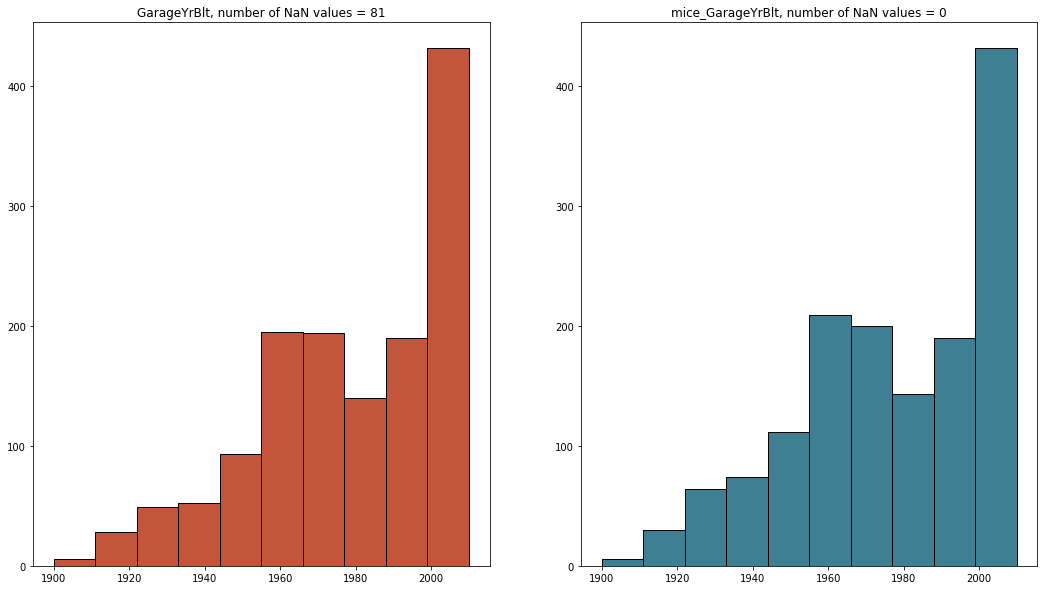

In [0]:
colors = sn.diverging_palette(20, 220, n=2)
titles = ['GarageYrBlt', 'mice_GarageYrBlt']

plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
plt.title('GarageYrBlt, number of NaN values = ' + X['GarageYrBlt'].isnull().sum().astype(str))
plt.hist(X['GarageYrBlt'], color = colors[0], edgecolor = 'black')

plt.subplot(1, 2, 2)
plt.title('mice_GarageYrBlt, number of NaN values = 0')
plt.hist(mice_GarageYrBlt, color = colors[1], edgecolor = 'black')



plt.show()

In [0]:
data_num[['GarageYrBlt']] = mice_GarageYrBlt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [0]:
data_num.isnull().sum().any()

False

In [0]:
data_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


We now have all the numerical features cleaned (no more NaN values).

## 5. Dealing with categorical features

In [0]:
# Features where 'nan' that have to be replace with 'NA' 
train_test[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
      'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
      'PoolQC','Fence','MiscFeature']] = train_test[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
      'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
      'PoolQC','Fence','MiscFeature']].fillna(value="NA")

# Features where 'nan' that have to be replace with 'None' 
train_test[['MasVnrType']] = train_test[['MasVnrType']].fillna(value="None")

### 5.1. Nominal categorical features

In [0]:
# Reportoring the nominal categorical attributes
nominal_features = pd.DataFrame(train_test[['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 
                       'Foundation', 'Functional', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning',
                       'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']])

names_nominal_features = ['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 
                       'Foundation', 'Functional', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning',
                       'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street']
nominal_features

,Alley,BldgType,CentralAir,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Foundation,Functional,GarageType,Heating,HouseStyle,LandContour,LotConfig,MSZoning,MasVnrType,MiscFeature,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType,Street
0,NA,1Fam,Y,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,Typ,Attchd,GasA,2Story,Lvl,Inside,RL,BrkFace,NA,CollgCr,CompShg,Gable,Normal,WD,Pave
1,NA,1Fam,Y,Feedr,Norm,SBrkr,MetalSd,MetalSd,CBlock,Typ,Attchd,GasA,1Story,Lvl,FR2,RL,None,NA,Veenker,CompShg,Gable,Normal,WD,Pave
2,NA,1Fam,Y,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,Typ,Attchd,GasA,2Story,Lvl,Inside,RL,BrkFace,NA,CollgCr,CompShg,Gable,Normal,WD,Pave
3,NA,1Fam,Y,Norm,Norm,SBrkr,Wd Sdng,Wd Shng,BrkTil,Typ,Detchd,GasA,2Story,Lvl,Corner,RL,None,NA,Crawfor,CompShg,Gable,Abnorml,WD,Pave
4,NA,1Fam,Y,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,Typ,Attchd,GasA,2Story,Lvl,FR2,RL,BrkFace,NA,NoRidge,CompShg,Gable,Normal,WD,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NA,1Fam,Y,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,Typ,Attchd,GasA,2Story,Lvl,Inside,RL,None,NA,Gilbert,CompShg,Gable,Normal,WD,Pave
1456,NA,1Fam,Y,Norm,Norm,SBrkr,Plywood,Plywood,CBlock,Min1,Attchd,GasA,1Story,Lvl,Inside,RL,Stone,NA,NWAmes,CompShg,Gable,Normal,WD,Pave
1457,NA,1Fam,Y,Norm,Norm,SBrkr,CemntBd,CmentBd,Stone,Typ,Attchd,GasA,2Story,Lvl,Inside,RL,None,Shed,Crawfor,CompShg,Gable,Normal,WD,Pave
1458,NA,1Fam,Y,Norm,Norm,FuseA,MetalSd,MetalSd,CBlock,Typ,Attchd,GasA,1Story,Lvl,Inside,RL,None,NA,NAmes,CompShg,Hip,Normal,WD,Pave


In [0]:
# 1st step: transformin into numerical labels
new_nominal_features = pd.DataFrame()

for i in range(len(names_nominal_features)):
  feature_le = LabelEncoder()
  name_category = nominal_features.columns[i]
  feature_labels = feature_le.fit_transform(nominal_features[name_category])
  nominal_features[names_nominal_features[i]+'_Label'] = feature_labels

  feature_ohe = OneHotEncoder()
  feature_feature_arr = feature_ohe.fit_transform(nominal_features[[names_nominal_features[i]+'_Label']]).toarray()
  feature_feature_arr = feature_feature_arr.astype(int)
  new_features_labels = [names_nominal_features[i]+'_'+str(cls_label) for cls_label in feature_le.classes_]
  new_features = pd.DataFrame(feature_feature_arr, columns=new_features_labels)
  new_nominal_features = pd.concat([new_nominal_features, new_features], axis=1)

In [0]:
# Merging 'Condition1' and 'Condition2' with an OR operation to reduce the number of features by 8
new_nominal_features['Condition1_Artery'] = new_nominal_features['Condition1_Artery'] | new_nominal_features['Condition2_Artery'] 
new_nominal_features['Condition1_Feedr'] = new_nominal_features['Condition1_Feedr'] | new_nominal_features['Condition2_Feedr'] 
new_nominal_features['Condition1_Norm'] = new_nominal_features['Condition1_Norm'] | new_nominal_features['Condition2_Norm']
new_nominal_features['Condition1_PosA'] = new_nominal_features['Condition1_PosA'] | new_nominal_features['Condition2_PosA'] 
new_nominal_features['Condition1_PosN'] = new_nominal_features['Condition1_PosN'] | new_nominal_features['Condition2_PosN'] 
new_nominal_features['Condition1_RRAe'] = new_nominal_features['Condition1_RRAe'] | new_nominal_features['Condition2_RRAe'] 
new_nominal_features['Condition1_RRAn'] = new_nominal_features['Condition1_RRAn'] | new_nominal_features['Condition2_RRAn'] 
new_nominal_features['Condition1_RRNn'] = new_nominal_features['Condition1_RRNn'] | new_nominal_features['Condition2_RRNn'] 

# Dropping the columns associated to 'Condition2'
new_nominal_features = new_nominal_features.drop(columns=['Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 
                                   'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn'])

In [0]:
# new_nominal_features.reset_index(drop=True)

In [0]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#pd.reset_option("display.max_rows", "display.max_columns")

#split_nominal_features = np.split(new_nominal_features, [1198], axis=0)
#train_nominal_features = split_nominal_features[0]
#test_nominal_features = split_nominal_features[1].reset_index()
#test_nominal_features = test_nominal_features.drop(columns=['index'])

#final_nominal_features = pd.concat([train_nominal_features,test_nominal_features],keys=['train','test'])
#final_nominal_features
new_nominal_features

,Alley_Grvl,Alley_NA,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1456,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1457,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1458,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [0]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#pd.reset_option("display.max_rows", "display.max_columns")
nominal_features.iloc[0:10, 3:5]

,Condition1,Condition2
0,Norm,Norm
1,Feedr,Norm
2,Norm,Norm
3,Norm,Norm
4,Norm,Norm
5,Norm,Norm
6,Norm,Norm
7,PosN,Norm
8,Artery,Norm
9,Artery,Artery


In [0]:
#final_nominal_features.iloc[0:10, 10:19]
new_nominal_features.iloc[0:10, 10:19]

,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,0
8,1,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0


The mapping is well done, and we succeed in merging 2 features: 'Condition1' and 'Condition2', that allows to reduce the feature dimension, going from 176 columns to 168. 

### 5.2. Ordinal categorical feature

In [0]:
# creating the ordinal feature dataframe from the train_test dataframe by extracting the ordinal features

ordinal_features = pd.DataFrame(train_test[['BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape', 'PavedDrive', 'PoolQC', 'Utilities']])
ordinal_features

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenQual,LandSlope,LotShape,PavedDrive,PoolQC,Utilities
0,TA,No,GLQ,Unf,Gd,TA,Gd,NA,NA,TA,RFn,TA,Ex,Gd,Gtl,Reg,Y,NA,AllPub
1,TA,Gd,ALQ,Unf,Gd,TA,TA,NA,TA,TA,RFn,TA,Ex,TA,Gtl,Reg,Y,NA,AllPub
2,TA,Mn,GLQ,Unf,Gd,TA,Gd,NA,TA,TA,RFn,TA,Ex,Gd,Gtl,IR1,Y,NA,AllPub
3,Gd,No,ALQ,Unf,TA,TA,TA,NA,Gd,TA,Unf,TA,Gd,Gd,Gtl,IR1,Y,NA,AllPub
4,TA,Av,GLQ,Unf,Gd,TA,Gd,NA,TA,TA,RFn,TA,Ex,Gd,Gtl,IR1,Y,NA,AllPub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,No,Unf,Unf,Gd,TA,TA,NA,TA,TA,RFn,TA,Ex,TA,Gtl,Reg,Y,NA,AllPub
1456,TA,No,ALQ,Rec,Gd,TA,TA,MnPrv,TA,TA,Unf,TA,TA,TA,Gtl,Reg,Y,NA,AllPub
1457,Gd,No,GLQ,Unf,TA,Gd,Ex,GdPrv,Gd,TA,RFn,TA,Ex,Gd,Gtl,Reg,Y,NA,AllPub
1458,TA,Mn,GLQ,Rec,TA,TA,TA,NA,NA,TA,Unf,TA,Gd,Gd,Gtl,Reg,Y,NA,AllPub


In [0]:
# transforming the 19 ordinal attributes

#BsmtCond

map1 = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ordinal_features['BsmtCond'] = ordinal_features['BsmtCond'].map(map1)

#BsmtExposure

map2 = { 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
ordinal_features['BsmtExposure'] = ordinal_features['BsmtExposure'].map(map2)

#BsmtFinType1

map3 = {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
ordinal_features['BsmtFinType1'] = ordinal_features['BsmtFinType1'].map(map3)

#BsmtFinType2

ordinal_features['BsmtFinType2'] = ordinal_features['BsmtFinType2'].map(map3)

#BsmtQual

ordinal_features['BsmtQual'] = ordinal_features['BsmtQual'].map(map1)

#ExterCond

map4 = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
ordinal_features['ExterCond'] = ordinal_features['ExterCond'].map(map4)

#ExterQual

ordinal_features['ExterQual'] = ordinal_features['ExterQual'].map(map4)

#Fence

map5 = { 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
ordinal_features['Fence'] = ordinal_features['Fence'].map(map5)

#FireplaceQu

ordinal_features['FireplaceQu'] = ordinal_features['FireplaceQu'].map(map1)

#GarageCond

ordinal_features['GarageCond'] = ordinal_features['GarageCond'].map(map1)

#GarageFinish

map6 = {'Unf': 1, 'RFn': 2, 'Fin': 3}
ordinal_features['GarageFinish'] = ordinal_features['GarageFinish'].map(map6)

#GarageQual

ordinal_features['GarageQual'] = ordinal_features['GarageQual'].map(map1)

#HeatingQC

ordinal_features['HeatingQC'] = ordinal_features['HeatingQC'].map(map4)

#KitchenQual

ordinal_features['KitchenQual'] = ordinal_features['KitchenQual'].map(map4)

#LandSlope

map7 = {'Sev': 0, 'Mod': 1, 'Gtl': 2}
ordinal_features['LandSlope'] = ordinal_features['LandSlope'].map(map7)

#LotShape

map8 = {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
ordinal_features['LotShape'] = ordinal_features['LotShape'].map(map8)

#PavedDrive

map9 = {'N': 0, 'P': 1, 'Y': 2}
ordinal_features['PavedDrive'] = ordinal_features['PavedDrive'].map(map9)

#PoolQC

map10 = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
ordinal_features['PoolQC'] = ordinal_features['PoolQC'].map(map10)

#Utilities

map11 = {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
ordinal_features['Utilities'] = ordinal_features['Utilities'].map(map11)

In [0]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
ordinal_features

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenQual,LandSlope,LotShape,PavedDrive,PoolQC,Utilities
0,3.0,1.0,6.0,1.0,4.0,2,3,NaN,NaN,3.0,2.0,3.0,4,3,2,3,2,NaN,3
1,3.0,4.0,5.0,1.0,4.0,2,2,NaN,3.0,3.0,2.0,3.0,4,2,2,3,2,NaN,3
2,3.0,2.0,6.0,1.0,4.0,2,3,NaN,3.0,3.0,2.0,3.0,4,3,2,2,2,NaN,3
3,4.0,1.0,5.0,1.0,3.0,2,2,NaN,4.0,3.0,1.0,3.0,3,3,2,2,2,NaN,3
4,3.0,3.0,6.0,1.0,4.0,2,3,NaN,3.0,3.0,2.0,3.0,4,3,2,2,2,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,1.0,1.0,4.0,2,2,NaN,3.0,3.0,2.0,3.0,4,2,2,3,2,NaN,3
1456,3.0,1.0,5.0,3.0,4.0,2,2,3.0,3.0,3.0,1.0,3.0,2,2,2,3,2,NaN,3
1457,4.0,1.0,6.0,1.0,3.0,3,4,4.0,4.0,3.0,2.0,3.0,4,3,2,3,2,NaN,3
1458,3.0,2.0,6.0,3.0,3.0,2,2,NaN,NaN,3.0,1.0,3.0,3,3,2,3,2,NaN,3


Big question : how to handle NaN values ? 
Our NaN values here are MNAR data 

helpful site : https://stefvanbuuren.name/fimd/sec-simplesolutions.html

Solutions to treat them :

- listwise deletion which is bad option (see downsides here https://en.wikipedia.org/wiki/Listwise_deletion)

- handling MNAR data as MAR data namely iputing their values : which is not optimal and btw rather bad (what we do after)

using MICE imputation to handle NA values : see here the mistakes we know we are doing https://conference.scipy.org/proceedings/scipy2018/pdfs/dillon_niederhut.pdf


In [0]:
mice_ordinal_features = mice(ordinal_features.values)

In [0]:
mice_ordinal_features_pd = pd.DataFrame(mice_ordinal_features)
mice_ordinal_features_pd.columns = [c for c in ordinal_features.columns]
mice_ordinal_features_pd

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenQual,LandSlope,LotShape,PavedDrive,PoolQC,Utilities
0,3.0,1.0,6.0,1.0,4.0,2.0,3.0,3.420429,3.575155,3.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,4.270666,3.0
1,3.0,4.0,5.0,1.0,4.0,2.0,2.0,2.910644,3.000000,3.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,5.623374,3.0
2,3.0,2.0,6.0,1.0,4.0,2.0,3.0,3.436899,3.000000,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,3.811046,3.0
3,4.0,1.0,5.0,1.0,3.0,2.0,2.0,3.017685,4.000000,3.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,2.783148,3.0
4,3.0,3.0,6.0,1.0,4.0,2.0,3.0,3.394936,3.000000,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,4.334821,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,1.0,1.0,4.0,2.0,2.0,3.067309,3.000000,3.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,3.390527,3.0
1456,3.0,1.0,5.0,3.0,4.0,2.0,2.0,3.000000,3.000000,3.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.865299,3.0
1457,4.0,1.0,6.0,1.0,3.0,3.0,4.0,4.000000,4.000000,3.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,4.944317,3.0
1458,3.0,2.0,6.0,3.0,3.0,2.0,2.0,2.895679,3.235777,3.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,3.295645,3.0


In [0]:
ordinal_features[['BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterCond', 
                  'ExterQual', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 
                  'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape', 'PavedDrive', 
                  'PoolQC', 'Utilities']] = mice_ordinal_features

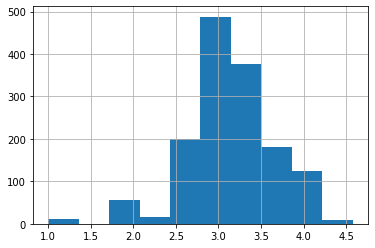

In [0]:
mice_ordinal_features_pd['Fence'].hist()

In [0]:
ordinal_features

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenQual,LandSlope,LotShape,PavedDrive,PoolQC,Utilities
0,3.0,1.0,6.0,1.0,4.0,2.0,3.0,3.420429,3.575155,3.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,4.270666,3.0
1,3.0,4.0,5.0,1.0,4.0,2.0,2.0,2.910644,3.000000,3.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,5.623374,3.0
2,3.0,2.0,6.0,1.0,4.0,2.0,3.0,3.436899,3.000000,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,3.811046,3.0
3,4.0,1.0,5.0,1.0,3.0,2.0,2.0,3.017685,4.000000,3.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,2.783148,3.0
4,3.0,3.0,6.0,1.0,4.0,2.0,3.0,3.394936,3.000000,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,4.334821,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,1.0,1.0,4.0,2.0,2.0,3.067309,3.000000,3.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,3.390527,3.0
1456,3.0,1.0,5.0,3.0,4.0,2.0,2.0,3.000000,3.000000,3.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.865299,3.0
1457,4.0,1.0,6.0,1.0,3.0,3.0,4.0,4.000000,4.000000,3.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,4.944317,3.0
1458,3.0,2.0,6.0,3.0,3.0,2.0,2.0,2.895679,3.235777,3.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,3.295645,3.0


## 6. [Direct Errors] : Row removal

We have encountered 2 problems with the "basement" Attributes : 
- rows : **948** and **332** 

Indeed, let us see both lines : 

In [0]:
train_test.iloc[[332]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NA,479,1603,3206,GasA,...,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,Normal,284000


Here, we have : [332]
- BsmtFinType2 : NaN
- BsmtFinSF2 : 479

In [0]:
train_test.iloc[[948]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NA,Unf,0,Unf,0,936,936,GasA,...,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,Normal,192500


We have : [948]
- BsmtQual             Gd
- BsmtCond             TA
- **BsmtExposure        NaN**
- BsmtFinType1        Unf
- BsmtFinType2        Unf

It is unusual to have BsmtExposure = NaN while there is clearly a Basement


In [0]:
data_num = data_num.drop([332,948])
ordinal_features = ordinal_features.drop([332,948])
new_nominal_features = new_nominal_features.drop([332,948])

In [0]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   OverallQual    1458 non-null   int64  
 5   OverallCond    1458 non-null   int64  
 6   YearBuilt      1458 non-null   int64  
 7   YearRemodAdd   1458 non-null   int64  
 8   MasVnrArea     1458 non-null   float64
 9   BsmtFinSF1     1458 non-null   int64  
 10  BsmtFinSF2     1458 non-null   int64  
 11  BsmtUnfSF      1458 non-null   int64  
 12  TotalBsmtSF    1458 non-null   int64  
 13  1stFlrSF       1458 non-null   int64  
 14  2ndFlrSF       1458 non-null   int64  
 15  LowQualFinSF   1458 non-null   int64  
 16  GrLivArea      1458 non-null   int64  
 17  BsmtFullBath   1458 non-null   int64  
 18  BsmtHalf

##7. Merging the 3 approaches

###7.1. Merging the 3 data_sets

- data_num : Numerical features (1458*38)
- new_nominal_features : Nominal Features (1458*168)
- ordinal_features : Ordinal categorical features (1458*19)

In [0]:
print(np.shape(data_num))
print(np.shape(new_nominal_features))
print(np.shape(ordinal_features))

(1458, 38)
(1458, 168)
(1458, 19)


In [0]:
clean = pd.concat([data_num, ordinal_features, new_nominal_features],axis=1)

In [0]:
clean.reset_index()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtCond,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3.0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,4.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,3.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1454,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,3.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1455,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,4.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1456,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,3.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


### 7.2. Splitting into training_set and testing_set

[Reminder] We dropped 2 rows in the data_set!!

In [0]:
train_clean = clean.iloc[0:1198, :]
test_clean = clean.iloc[1198:1460, :]

In [0]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1199
Columns: 225 entries, Id to Street_Pave
dtypes: float64(22), int64(203)
memory usage: 2.1 MB


In [0]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1200 to 1459
Columns: 225 entries, Id to Street_Pave
dtypes: float64(22), int64(203)
memory usage: 459.1 KB


In [0]:
train_clean.to_csv('train.csv')
test_clean.to_csv('test.csv')

# II. Outliers & Features_Selection

---



## 1. Data Importation

Here, we will import the cleaned data (from the previous notebook) 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [0]:
data_train = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Data_inter_dont_use_it!/train.csv', delimiter=',')
data_test = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Data_inter_dont_use_it!/test.csv', delimiter=',')

In [0]:
data_train = data_train.drop(columns=['Unnamed: 0'])
data_test = data_test.drop(columns=['Unnamed: 0'])

We will look at the data in order to well prepare the outliers detection/removal

## 2. Data Visualisation

### 2.1 Sale Price distribution

Skewed data : when curve appears distorted or skewed either to the left or to the right, in a statistical distribution.

- Right-skewed data
- Left-skewed data

In skewed data, the tail region may act as an outlier for the statistical model.

There are many ways to deal with skewed data : 
- Log transformation 
- Square Root Transform
- Box-Cox Transform


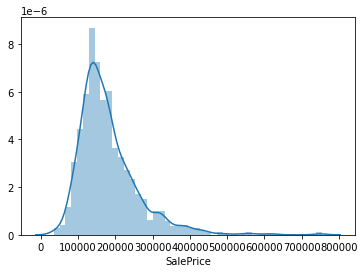

In [0]:
sns.distplot(data_train['SalePrice']);

We can clearly see that the data is skewed [see section 4]

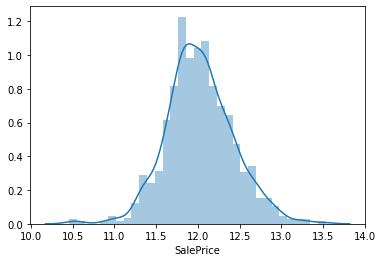

In [0]:
sns.distplot(np.log(data_train['SalePrice']));

Figure(720x504)


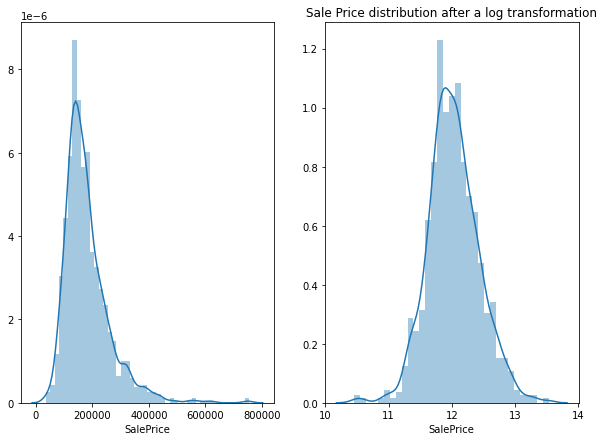

In [0]:
f, axes = plt.subplots(1, 2, figsize=(10, 7))
plt.title('Sale Price distribution')
sns.distplot(data_train['SalePrice'] ,ax=axes[0] )

sns.distplot(np.log(data_train['SalePrice']),ax=axes[1]);
plt.title('Sale Price distribution after a log transformation')
print(f)

In [0]:
f.savefig("Sale_Price_distribution.png")

In [0]:
scipy.stats.skew(np.log(data_train['SalePrice']))

0.13498593122027003

It looks even more like a normal distribution, what is very good for our models. We should keep it this way. 

##3. Dealing with the output ['SalePrice] : Log transformation

Let us see with Box Cox transformation

In [0]:
scipy.stats.skew(data_train.SalePrice)

1.9689239630086286

Here, the skew coefficient is very high.

In [0]:
box_cox = scipy.stats.boxcox(data_train.SalePrice,lmbda=None)[-1]

In [0]:
box_cox

-0.08282013058593049

We will add a column named 'logSalePrice' in our data_set (both training and testing).

In [0]:
data_train['logSalePrice'] = np.log(data_train.SalePrice) 
data_test['logSalePrice'] = np.log(data_test.SalePrice) 

In [0]:
scipy.stats.skew(data_train.logSalePrice)

0.13498593122027003

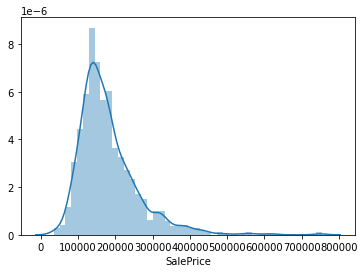

In [0]:
sns.distplot(data_train['SalePrice'])

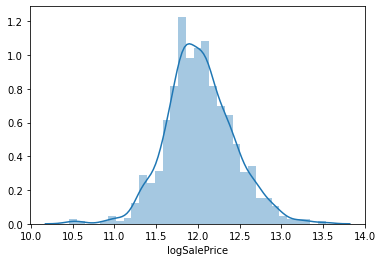

In [0]:
sns.distplot(data_train['logSalePrice'])

##4. Outliers and skewed data in each numerical feature

### 4.1 Which features should we choose? 

First we need to keep only the numerical features (because this treatment will be relevant only on numerical features). 

In [0]:
numerical_features_columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','logSalePrice']

In [0]:
numerical_features = data_train[numerical_features_columns]

In [0]:
numerical_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,logSalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,6.753438,854,0,7.444833,1,0,2,1,3,1,2.197225,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,7.141245,0,0,7.141245,0,1,2,0,3,1,1.945910,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,6.825460,866,0,7.488294,1,0,2,1,3,1,1.945910,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,6.869014,756,0,7.448916,1,0,1,0,3,1,2.079442,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,7.044033,1053,0,7.695758,1,0,2,1,4,1,2.302585,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,60,51.0,8029,6,5,2005,2005,0.0,0,0,728,728,6.591674,728,0,7.284135,0,0,2,1,3,1,2.197225,0,2005.0,2,400,100,24,0,0,0,0,0,7,2008,12.078239
1194,60,58.0,14054,7,5,2006,2006,0.0,0,0,879,879,6.779922,984,0,7.530480,0,0,2,1,4,1,2.302585,1,2006.0,3,660,100,17,0,0,0,0,0,11,2006,12.297785
1195,75,65.0,8850,7,6,1916,1950,0.0,0,0,815,815,6.704414,875,0,7.433075,0,0,1,0,3,1,2.079442,1,1916.0,1,225,0,0,330,0,0,0,0,7,2006,11.877569
1196,20,70.0,9100,7,5,2001,2001,0.0,0,0,1212,1212,7.100852,0,0,7.100852,0,0,2,0,3,1,1.945910,0,2001.0,2,573,356,0,0,0,0,0,0,6,2009,12.089539


I will do the data treatement only on the most influent data of these inputs. Let's see the correlation between these data and the SalePrice to treat only the most important ones.

In [0]:
correlation = pd.DataFrame(numerical_features.corr()['logSalePrice']).sort_values(by=['logSalePrice'],ascending=False)
print(correlation)

               logSalePrice
logSalePrice       1.000000
OverallQual        0.818402
GrLivArea          0.745737
GarageCars         0.681230
GarageArea         0.650514
TotalBsmtSF        0.643667
1stFlrSF           0.609481
FullBath           0.606747
YearBuilt          0.590265
GarageYrBlt        0.581700
YearRemodAdd       0.572834
TotRmsAbvGrd       0.556966
Fireplaces         0.482023
MasVnrArea         0.432286
BsmtFinSF1         0.391381
2ndFlrSF           0.343742
HalfBath           0.330879
WoodDeckSF         0.328049
OpenPorchSF        0.322105
LotArea            0.258104
BsmtFullBath       0.229293
BedroomAbvGr       0.223102
BsmtUnfSF          0.213610
LotFrontage        0.206934
ScreenPorch        0.128005
PoolArea           0.067011
MoSold             0.058156
3SsnPorch          0.037474
BsmtFinSF2         0.009906
BsmtHalfBath      -0.006810
MiscVal           -0.039722
OverallCond       -0.040100
LowQualFinSF      -0.041872
YrSold            -0.051579
MSSubClass        -0

Let's select the most influential features. (threshold correlation put to 0.3)

In [0]:
influential_feat=correlation[correlation['logSalePrice']>0.3]
influential_feat

,logSalePrice
logSalePrice,1.000000
OverallQual,0.818402
GrLivArea,0.745737
GarageCars,0.681230
GarageArea,0.650514
TotalBsmtSF,0.643667
1stFlrSF,0.609481
FullBath,0.606747
YearBuilt,0.590265
GarageYrBlt,0.581700


We take the column names of the most influential features.

In [0]:
index_influential_feat=influential_feat.index

In [0]:
index_influential_feat

Index(['logSalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'GarageYrBlt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea',
       'BsmtFinSF1', '2ndFlrSF', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [0]:
index_influential_feat= index_influential_feat.drop('logSalePrice')

In [0]:
index_influential_feat=index_influential_feat.values
print(index_influential_feat)

['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'YearBuilt' 'GarageYrBlt' 'YearRemodAdd'
 'TotRmsAbvGrd' 'Fireplaces' 'MasVnrArea' 'BsmtFinSF1' '2ndFlrSF'
 'HalfBath' 'WoodDeckSF' 'OpenPorchSF']


### 4.2 Treatement of the features

#### 4.2.1 Is the data skewed? 

In [0]:
skew_index= []
for i in index_influential_feat: 
  skew_index.append((i, scipy.stats.skew(data_train[[i]])[0], scipy.stats.skew(np.log(data_train[[i]]))[0]))

pd.DataFrame(skew_index, columns=['Feature','Skew value', 'Skew value with log values'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1010: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


,Feature,Skew value,Skew value with log values
0,OverallQual,0.194589,-1.048506
1,GrLivArea,-0.020551,-0.181079
2,GarageCars,-0.368433,NaN
3,GarageArea,0.143741,NaN
4,TotalBsmtSF,0.479623,NaN
5,1stFlrSF,-0.008677,-0.147627
6,FullBath,0.073899,NaN
7,YearBuilt,-0.612822,-0.640571
8,GarageYrBlt,-0.537028,-0.557399
9,YearRemodAdd,-0.516974,-0.524510


We can correct some of these features to be closer to a normal distribution for those who have a shape closed to a normal distribution.
It's the case of : 
- 1stFlrSF
- GrLivArea
- TotRmsAbvGrd



In [0]:
data_train['1stFlrSF'] = np.log1p(data_train['1stFlrSF'])
data_train['GrLivArea'] = np.log1p(data_train.GrLivArea)
data_train['TotRmsAbvGrd'] = np.log1p(data_train.TotRmsAbvGrd)

In [0]:
data_test['1stFlrSF'] = np.log1p(data_test['1stFlrSF'])
data_test['GrLivArea'] = np.log1p(data_test.GrLivArea)
data_test['TotRmsAbvGrd'] = np.log1p(data_test.TotRmsAbvGrd)

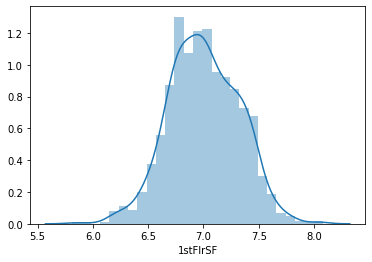

In [0]:
sns.distplot(data_train['1stFlrSF'])

In [0]:
scipy.stats.skew(data_train['1stFlrSF'])

-0.008676549299253806

#### 4.2.2 Removing outliers using interquartile range methods

https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07

- Interquartile range is given by, IQR = Q3 — Q1
**Upper limit** = Q3+3*IQR (threshold chosen at +3 and -3)
**Lower limit** = Q1-3*IQR

**Anything below the lower limit and above the upper limit is considered an outlier**

Remark : We are aware of the **limitations of such method**. Indeed, here, the way we deal with outliers doesn't take into account the multivariate aspect of the problem (the fact of having a lot of features). We will do it anyway, and have a look at the Isolation Forest Algorithm (which can complete our work).

##### - What about *OverallQual* ?

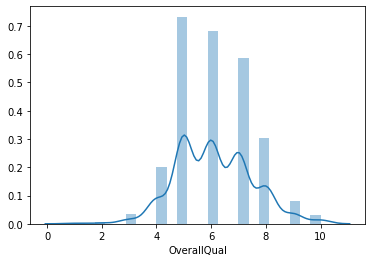

In [0]:
sns.distplot(data_train['OverallQual'])

In [0]:
IQR=scipy.stats.iqr(data_train['OverallQual'])
Q=pd.DataFrame(data_train.OverallQual.quantile([0.25,0.75]))
Q1= Q.loc[{0.25}].values[0][0]
Q3=Q.loc[{0.75}].values[0][0]
indexToDrop=data_train[(data_train['OverallQual']>(Q3+3*IQR)) | (data_train['OverallQual']<(Q1-3*IQR))].index
print(indexToDrop)

Int64Index([], dtype='int64')


##### - What about *YearBuilt* ?

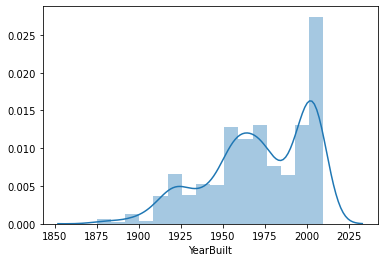

In [0]:
sns.distplot(data_train['YearBuilt'])

In [0]:
IQR=scipy.stats.iqr(data_train['YearBuilt'])
Q=pd.DataFrame(data_train.YearBuilt.quantile([0.25,0.75]))
Q1= Q.loc[{0.25}].values[0][0]
Q3=Q.loc[{0.75}].values[0][0]
indexToDrop=data_train[(data_train['YearBuilt']>(Q3+3*IQR)) | (data_train['YearBuilt']<(Q1-3*IQR))].index
print(indexToDrop)


Int64Index([], dtype='int64')


YearBuilt


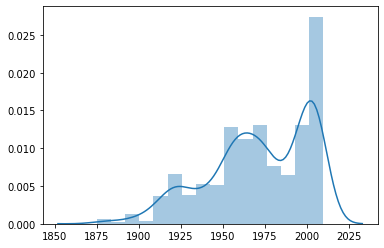

In [0]:
i=index_influential_feat[7]
print(i)
sns.distplot(data_train[[i]])

In [0]:
IQR=scipy.stats.iqr(data_train[[i]])
Q=pd.DataFrame(data_train[[i]].quantile([0.25,0.75]))

Q1= Q.loc[{0.25}].values[0][0]
Q3=Q.loc[{0.75}].values[0][0]


indexToDrop=data_train[(data_train[i]>(Q3+3*IQR)) | (data_train[i]<(Q1-3*IQR))].index
print(indexToDrop)



Int64Index([], dtype='int64')


##### - Generalization : what about all the influential features?

Let's try to see on all the influential features how many rows need to be drop according to this method.

In [0]:
indexToDrop_with_key=[]
indexToDrop=[]
for i in index_influential_feat:
  IQR=scipy.stats.iqr(data_train[[i]])
  Q=pd.DataFrame(data_train[[i]].quantile([0.25,0.75]))
  Q1= Q.loc[{0.25}].values[0][0]
  Q3=Q.loc[{0.75}].values[0][0]
  indexToDrop.append(data_train[(data_train[i]>(Q3+3*IQR)) | (data_train[i]<(Q1-3*IQR))].index.values)
  indexToDrop_with_key.append((i,data_train[(data_train[i]>(Q3+3*IQR)) | (data_train[i]<(Q1-3*IQR))].index.values))
print(pd.DataFrame(indexToDrop_with_key,columns=['Column name', 'Index to drop according to IQR method thres=3']))

     Column name      Index to drop according to IQR method thres=3
0    OverallQual                                                 []
1      GrLivArea                                                 []
2     GarageCars                                                 []
3     GarageArea                                        [580, 1188]
4    TotalBsmtSF                                    [439, 495, 522]
5       1stFlrSF                                                 []
6       FullBath                                                 []
7      YearBuilt                                                 []
8    GarageYrBlt                                                 []
9   YearRemodAdd                                                 []
10  TotRmsAbvGrd                                                 []
11    Fireplaces                                                 []
12    MasVnrArea  [58, 70, 105, 115, 178, 224, 297, 348, 476, 51...
13    BsmtFinSF1                                

We can distinguish to types of behaviour :
- When there are to many data to drop : it means that the features contains to much 0 values (ie : MasVnrArea). We will not be considering it.
- The other ones: 
  - *TotalBsmtSF* ==> **3 Outliers** ==> We drop it
  - *GarageArea*  ==> **2 Outliers** ==> We drop it
  - *WoodDeckSF* ==> **2 Outliers** ==> We drop it

In [0]:
indexToDrop[4]

array([439, 495, 522])

In [0]:
## Question : j'ai fait les index en ordre croissant... Ca change quelque chose?

data_train = data_train.drop(indexToDrop[16])


In [0]:
data_train = data_train.drop(indexToDrop[3])
data_train = data_train.drop(indexToDrop[4])

In [0]:
# Be carefull, it allows us not to have 'gaps' in the data_set!! 

data_train = data_train.reset_index(drop=True)

#### 4.2.3 Removing outliers using the Isolation Forest Algorithm

First, we will prepare the data that the estimator will fit.

In [0]:
X_train_IsFo = data_train.drop(['SalePrice','logSalePrice'],axis=1)
X_train_IsFo = X_train_IsFo.reset_index(drop=True)

In [0]:
X_train_IsFo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtCond,BsmtExposure,BsmtFinType1,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,6.753438,854,0,7.444833,1,0,2,1,3,1,2.197225,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,3.0,1.0,6.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,7.141245,0,0,7.141245,0,1,2,0,3,1,1.945910,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,3.0,4.0,5.0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,6.825460,866,0,7.488294,1,0,2,1,3,1,1.945910,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,3.0,2.0,6.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,6.869014,756,0,7.448916,1,0,1,0,3,1,2.079442,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,4.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,7.044033,1053,0,7.695758,1,0,2,1,4,1,2.302585,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,3.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1196,60,51.0,8029,6,5,2005,2005,0.0,0,0,728,728,6.591674,728,0,7.284135,0,0,2,1,3,1,2.197225,0,2005.0,2,400,100,24,0,0,0,0,0,7,2008,3.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1187,1197,60,58.0,14054,7,5,2006,2006,0.0,0,0,879,879,6.779922,984,0,7.530480,0,0,2,1,4,1,2.302585,1,2006.0,3,660,100,17,0,0,0,0,0,11,2006,3.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1188,1198,75,65.0,8850,7,6,1916,1950,0.0,0,0,815,815,6.704414,875,0,7.433075,0,0,1,0,3,1,2.079442,1,1916.0,1,225,0,0,330,0,0,0,0,7,2006,3.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1189,1199,20,70.0,9100,7,5,2001,2001,0.0,0,0,1212,1212,7.100852,0,0,7.100852,0,0,2,0,3,1,1.945910,0,2001.0,2,573,356,0,0,0,0,0,0,6,2009,3.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train_IsFo)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [0]:
outliers = clf.predict(X_train_IsFo)
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
outliers_PD = pd.DataFrame(outliers,columns=['IsOutlier'])
outliers_PD

,IsOutlier
0,1
1,1
2,1
3,1
4,1
...,...
1186,1
1187,1
1188,1
1189,1


In [0]:
outlier_index = outliers_PD[outliers_PD['IsOutlier'] == -1].index.values
outlier_index

array([184, 373, 629, 699, 741])

Let us drop them in the data_train

In [0]:
data_train = data_train.drop(outlier_index)

In [0]:
# Be carefull, it allows us not to have 'gaps' in the data_set!! 

data_train = data_train.reset_index(drop=True)
data_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtCond,BsmtExposure,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,logSalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,6.753438,854,0,7.444833,1,0,2,1,3,1,2.197225,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,7.141245,0,0,7.141245,0,1,2,0,3,1,1.945910,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3.0,4.0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,6.825460,866,0,7.488294,1,0,2,1,3,1,1.945910,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3.0,2.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,6.869014,756,0,7.448916,1,0,1,0,3,1,2.079442,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,4.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,7.044033,1053,0,7.695758,1,0,2,1,4,1,2.302585,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3.0,3.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1196,60,51.0,8029,6,5,2005,2005,0.0,0,0,728,728,6.591674,728,0,7.284135,0,0,2,1,3,1,2.197225,0,2005.0,2,400,100,24,0,0,0,0,0,7,2008,176000,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.078239
1182,1197,60,58.0,14054,7,5,2006,2006,0.0,0,0,879,879,6.779922,984,0,7.530480,0,0,2,1,4,1,2.302585,1,2006.0,3,660,100,17,0,0,0,0,0,11,2006,219210,3.0,3.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,12.297785
1183,1198,75,65.0,8850,7,6,1916,1950,0.0,0,0,815,815,6.704414,875,0,7.433075,0,0,1,0,3,1,2.079442,1,1916.0,1,225,0,0,330,0,0,0,0,7,2006,144000,3.0,1.0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,11.877569
1184,1199,20,70.0,9100,7,5,2001,2001,0.0,0,0,1212,1212,7.100852,0,0,7.100852,0,0,2,0,3,1,1.945910,0,2001.0,2,573,356,0,0,0,0,0,0,6,2009,178000,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.089539


## 5. Features selection

Interesting article : 
https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2
Different methods:
- Filter based: We specify some metric and based on that filter features. Ex : 
  - Pearson Correlation
  - Mutual information
- Wrapper-based: Wrapper methods consider the selection of a set of features as a search problem. Ex :
  - Recursive Feature Elimination : really depends on the model we will use (not very generalisable to any methods).

Why not putting this together? 

### 5.1 ['Id'] feature

First, we will delete the 'Id' feature.

In [0]:
data_train = data_train.drop('Id',axis=1)
data_test = data_test.drop('Id',axis=1)

In [0]:
data_train = data_train.drop('SalePrice',axis=1)
data_test = data_test.drop('SalePrice',axis=1)

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Columns: 224 entries, MSSubClass to logSalePrice
dtypes: float64(26), int64(198)
memory usage: 2.0 MB


### 5.2 Trying the three features selection algorithms

**Approach** : Our goal is to test all 3 methods, and counting which features go missing the most (taking the 3 algorithms into account)

We have **two thresholds** to set : 

- Each algorithm asks for a number of features to select (we will call it **num_feats**). We will use (**arbitrary choice**) : 
  - num_feats = 50
  - num_feats = 100
  - num_feats = 150
- Once we have all the results, wich features should we take? We decided to keep the features that have been selected by **at least 3** of the 4 algorithms. (**arbitrary choice**)

Here, is the code with num_feats = 150

In [0]:
num_feats = 150

In [0]:
X = data_train.drop(['logSalePrice'],axis=1)

# We need to convert the data_type to ('float64')
y = pd.DataFrame(data_train['logSalePrice']).astype('float64')

In [0]:
feature_name = X.columns.tolist()

#### 5.2.1 Persoan Correlation

We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [0]:
cor_list = [] #We will get the Persoan correlation between each feature and the 'logSalePrice'.

for i in X.columns.tolist():
    cor = np.corrcoef(pd.DataFrame(X[i]), y)[0, 1]
    cor_list.append(cor)


# replace NaN with 0
cor_list = [0 if np.isnan(i) else i for i in cor_list]

# feature name
cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()

# feature selection? 0 for not select, 1 for select
cor_support = [True if i in cor_feature else False for i in feature_name]

Here, are the 100 features that have been selected.

In [0]:
cor_feature_pd = pd.DataFrame(cor_feature)
cor_feature_pd

,0
0,SaleType_CWD
1,SaleType_Con
2,SaleType_ConLD
3,SaleType_ConLI
4,SaleType_ConLw
...,...
145,Electrical_SBrkr
146,Exterior1st_AsbShng
147,Exterior1st_AsphShn
148,Condition1_PosN


#### 5.2.2 Mutual information Selector

Select features according to the mutual information highest scores.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

In [0]:
mut_inf_selector = SelectKBest(mutual_info_regression, k=num_feats)
mut_inf_selector.fit(X, y)
mut_inf_support = mut_inf_selector.get_support()
mut_inf_feature = X.loc[:,mut_inf_support].columns.tolist()

In [0]:
mut_inf_feature_pd = pd.DataFrame(mut_inf_feature)
mut_inf_feature_pd

,0
0,MSSubClass
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
...,...
145,SaleCondition_Normal
146,SaleCondition_Partial
147,SaleType_COD
148,SaleType_New


#### 5.2.3 Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

##### 5.2.3.a LinearRegressionModel

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=1)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
rfe_feature_pd = pd.DataFrame(rfe_feature)
rfe_feature_pd

,0
0,BsmtExposure
1,BsmtFinType1
2,BsmtFinType2
3,BsmtQual
4,ExterCond
...,...
145,SaleType_New
146,SaleType_Oth
147,SaleType_WD
148,Street_Grvl


##### 5.2.3.b Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfe_selector_2 = RFE(estimator=RandomForestRegressor(), n_features_to_select=num_feats, step=1)
rfe_selector_2.fit(X, y)
rfe_support_2 = rfe_selector_2.get_support()
rfe_feature_2 = X.loc[:,rfe_support_2].columns.tolist()

#### 5.2.4 Merging the results

Each of the 4 algorithm have selected the top 100 features to keep. Let's now **merge the results**.

In [0]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Mutual Information':mut_inf_support, 
                                     'Linear Reg':rfe_support, 'Random Forest':rfe_support_2})
#feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Mutual Information':mut_inf_support, 
#                                     'Linear Reg':rfe_support, 'Random Forest':rfe_support_2})


# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [0]:
feature_selection_df

,Feature,Pearson,Mutual Information,Linear Reg,Random Forest,Total
1,SaleType_WD,True,True,True,True,4
2,SaleType_New,True,True,True,True,4
3,RoofMatl_CompShg,True,True,True,True,4
4,PoolQC,True,True,True,True,4
5,Neighborhood_Timber,True,True,True,True,4
...,...,...,...,...,...,...
219,MSZoning_RH,False,False,False,False,0
220,HouseStyle_2.5Unf,False,False,False,False,0
221,HouseStyle_2.5Fin,False,False,False,False,0
222,Heating_OthW,False,False,False,False,0


We can have 2 different approaches here : 
- Either we only keep the features that have been selected by **at least 3** of them.
- Or, we only delete the features that have been selected by **at most 1** of them 

In [0]:
features_kept =  feature_selection_df[feature_selection_df['Total']>=3] 

In [0]:
features_kept_names = features_kept['Feature'].values

In [0]:
len(features_kept_names)

138

#### 5.2.5 Analysing the results (over the numerical data)

In [0]:
numerical_features_columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','logSalePrice']

In [0]:
numerical_features_pd = pd.DataFrame(data_train[numerical_features_columns])

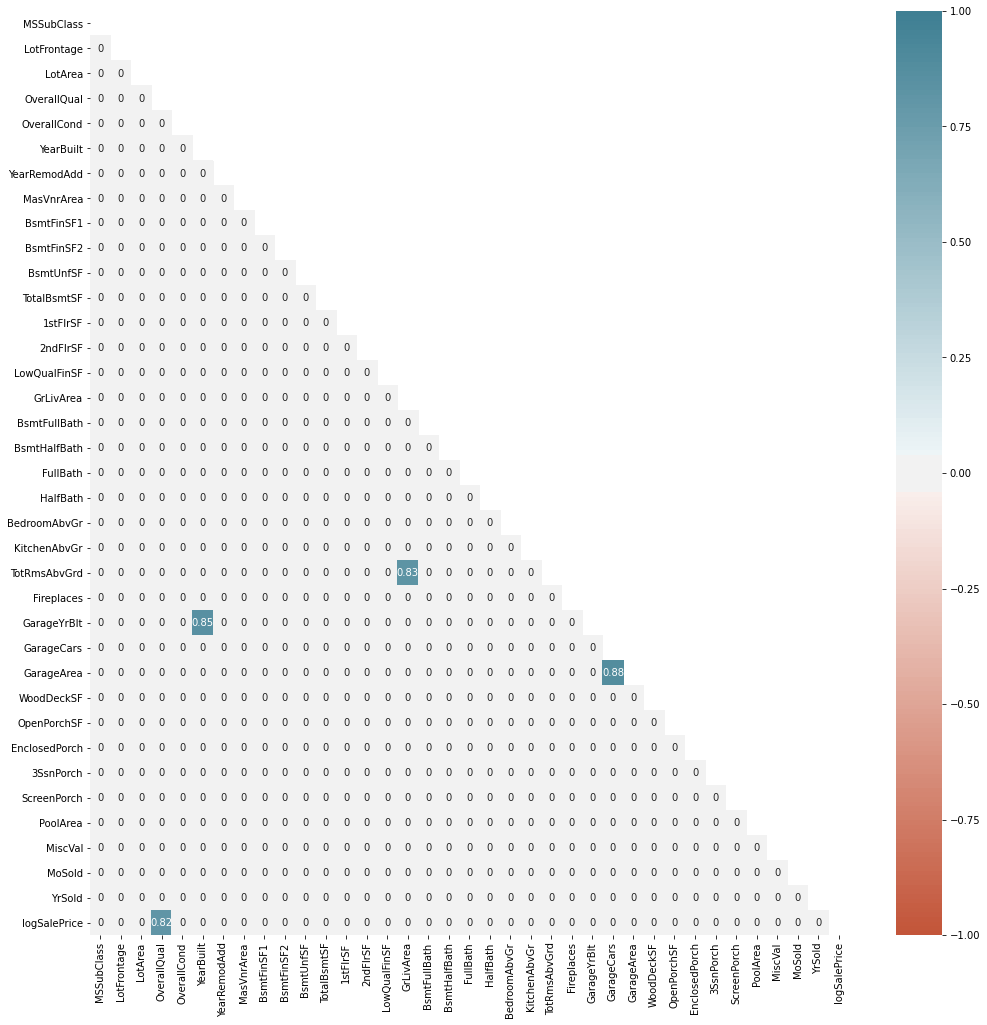

In [0]:
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corrMatrix = numerical_features_pd.corr()
corrMatrix[np.abs(corrMatrix) <= 0.8] = 0

plt.figure(figsize=(17,17))
sns.heatmap(corrMatrix, vmin = 1, vmax = -1, cmap=sns.diverging_palette(20, 220, n=200), annot = True, mask = mask)
plt.show()


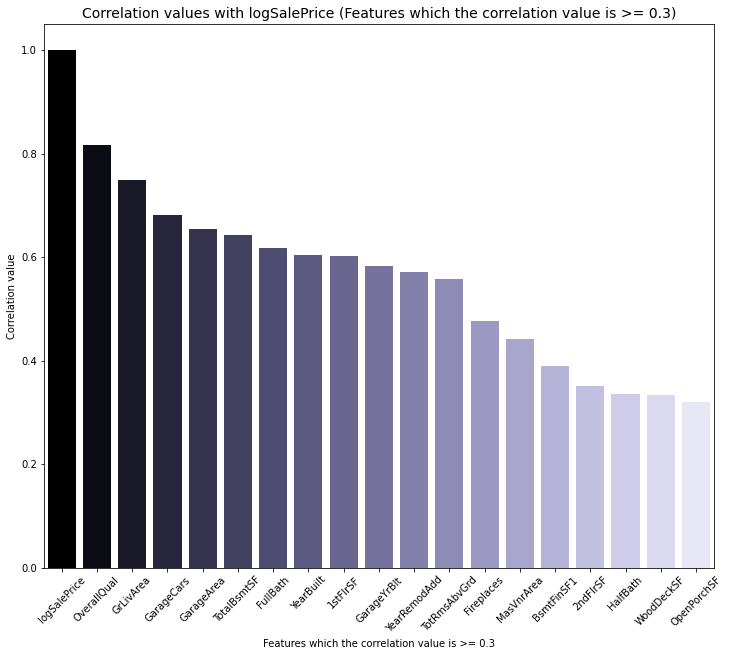

In [0]:
fig = plt.figure(figsize=(12,10))
plt.title("Correlation values with logSalePrice (Features which the correlation value is >= 0.3)",fontsize=14)
plt.xlabel("Features which the correlation value is >= 0.3", fontsize = 10)
plt.ylabel("Correlation value",fontsize = 10)

corr_log_price = corrMatrix[corrMatrix['logSalePrice']>=0.3]['logSalePrice'].sort_values(ascending=False)
graph = sns.barplot(corr_log_price.index, corr_log_price.values, palette = sns.cubehelix_palette(20, start=3, rot=0, dark=0, light=.95, reverse=True) )
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
plt.show()

Let's see if there are strongly correlated features that we didn't keep in our data set : 

In [0]:
list_missed_items = [item for item in corr_log_price.index if item not in features_kept_names] 
list_missed_items

[]

In [0]:
X_train = pd.DataFrame(data_train[features_kept_names])
X_test = pd.DataFrame(data_test[features_kept_names])

y_train = pd.DataFrame(data_train['logSalePrice'])
y_test = pd.DataFrame(data_test['logSalePrice'])

data_train_47 = pd.concat([X_train,y_train],axis=1)
data_test_47 = pd.concat([X_test,y_test],axis=1)

In [0]:
data_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,...,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,logSalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,6.753438,854,0,7.444833,1,0,2,1,3,1,2.197225,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,3.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,7.141245,0,0,7.141245,0,1,2,0,3,1,1.945910,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,3.0,4.0,5.0,1.0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,6.825460,866,0,7.488294,1,0,2,1,3,1,1.945910,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,3.0,2.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,6.869014,756,0,7.448916,1,0,1,0,3,1,2.079442,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,4.0,1.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,7.044033,1053,0,7.695758,1,0,2,1,4,1,2.302585,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,3.0,3.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,60,51.0,8029,6,5,2005,2005,0.0,0,0,728,728,6.591674,728,0,7.284135,0,0,2,1,3,1,2.197225,0,2005.0,2,400,100,24,0,0,0,0,0,7,2008,3.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.078239
1185,60,58.0,14054,7,5,2006,2006,0.0,0,0,879,879,6.779922,984,0,7.530480,0,0,2,1,4,1,2.302585,1,2006.0,3,660,100,17,0,0,0,0,0,11,2006,3.0,3.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,12.297785
1186,75,65.0,8850,7,6,1916,1950,0.0,0,0,815,815,6.704414,875,0,7.433075,0,0,1,0,3,1,2.079442,1,1916.0,1,225,0,0,330,0,0,0,0,7,2006,3.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,11.877569
1187,20,70.0,9100,7,5,2001,2001,0.0,0,0,1212,1212,7.100852,0,0,7.100852,0,0,2,0,3,1,1.945910,0,2001.0,2,573,356,0,0,0,0,0,0,6,2009,3.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,12.089539


In [0]:
data_train.to_csv('data_train_all.csv')
data_test.to_csv('data_test_all.csv')

Every feature strongly correlated with 'logSalePrice' are in the features that we kept : great!! 

## 6. Normalising and Standardising the data

- Normalization : scales a variable to have a **values between 0 and 1**
- Standardization : transforms data to have a **mean of zero** and a standard deviation of 1. Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Refer to : https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff


**We decided not to do it here.**

# III. Model Selection

In this section you can find all the code we did to test different models. 

## 1. Linear models

In [0]:
import pandas as pd
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from math import sqrt
from xgboost import XGBRegressor, DMatrix, cv, plot_importance, train
from sklearn.svm import SVR
from sklearn.utils.validation import column_or_1d
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The evaluation method for this challenge is the **root mean squared error between the logarithm of the predicted value and the logarithm of the observed sales price**. Taking logs ensures that errors in predicting expensive houses and cheap houses will have a similar impact on the overall result.

For n_features = 75

In [0]:
n_features = ['47', '75', '138', 'all']

Remark : If you want to change the data set, you just have to change the value of n_features between : 
- '47'
- '75'
- '138'
- 'all'

No need to change the code below!

In [0]:
target = 'logSalePrice'
IDcol = 'Unnamed: 0'

data_train1_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features[0] + '/data_train_' + n_features[0] + '.csv', delimiter=',')
data_test1_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features[0] + '/data_test_' + n_features[0] + '.csv', delimiter=',')

data_train2_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features[1] + '/data_train_' + n_features[1] + '.csv', delimiter=',')
data_test2_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features[1] + '/data_test_' + n_features[1] + '.csv', delimiter=',')

data_train3_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features[2] + '/data_train_' + n_features[2] + '.csv', delimiter=',')
data_test3_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features[2] + '/data_test_' + n_features[2] + '.csv', delimiter=',')

data_train4_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features[3] + '/data_train_' + n_features[3] + '.csv', delimiter=',')
data_test4_pd = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features[3] + '/data_test_' + n_features[3] + '.csv', delimiter=',')

In [0]:
data_train1 = data_train1_pd.drop(['Unnamed: 0'],axis=1)
data_test1 = data_test1_pd.drop(['Unnamed: 0'],axis=1)

data_train2 = data_train2_pd.drop(['Unnamed: 0'],axis=1)
data_test2 = data_test2_pd.drop(['Unnamed: 0'],axis=1)

data_train3 = data_train3_pd.drop(['Unnamed: 0'],axis=1)
data_test3 = data_test3_pd.drop(['Unnamed: 0'],axis=1)

data_train4 = data_train4_pd.drop(['Unnamed: 0'],axis=1)
data_test4 = data_test4_pd.drop(['Unnamed: 0'],axis=1)

Separation between inputs (X) and outputs (y)

In [0]:
X_train1_pd =  data_train1.drop(['logSalePrice'],axis=1)
X_test1_pd =  data_test1.drop(['logSalePrice'],axis=1)
y_train1_pd = pd.DataFrame(data_train1['logSalePrice'])
y_test1_pd = pd.DataFrame(data_test1['logSalePrice'])

X_train2_pd =  data_train2.drop(['logSalePrice'],axis=1)
X_test2_pd =  data_test2.drop(['logSalePrice'],axis=1)
y_train2_pd = pd.DataFrame(data_train2['logSalePrice'])
y_test2_pd = pd.DataFrame(data_test2['logSalePrice'])

X_train3_pd =  data_train3.drop(['logSalePrice'],axis=1)
X_test3_pd =  data_test3.drop(['logSalePrice'],axis=1)
y_train3_pd = pd.DataFrame(data_train3['logSalePrice'])
y_test3_pd = pd.DataFrame(data_test3['logSalePrice'])

X_train4_pd =  data_train4.drop(['logSalePrice'],axis=1)
X_test4_pd =  data_test4.drop(['logSalePrice'],axis=1)
y_train4_pd = pd.DataFrame(data_train4['logSalePrice'])
y_test4_pd = pd.DataFrame(data_test4['logSalePrice'])

In [0]:
X_train1_pd.head()

,PoolQC,LotShape,KitchenQual,GarageFinish,GarageCond,FireplaceQu,Fence,ExterQual,BsmtQual,BsmtFinType1,BsmtExposure,YearRemodAdd,YearBuilt,WoodDeckSF,TotalBsmtSF,TotRmsAbvGrd,OverallQual,OverallCond,OpenPorchSF,MasVnrType_None,MasVnrArea,MSZoning_RM,MSSubClass,LotFrontage,LotArea,HeatingQC,HalfBath,GrLivArea,GarageYrBlt,GarageType_Detchd,GarageType_Attchd,GarageQual,GarageCars,GarageArea,FullBath,Foundation_PConc,Foundation_CBlock,Fireplaces,Exterior2nd_VinylSd,Exterior1st_VinylSd,ExterCond,CentralAir_Y,BsmtUnfSF,BsmtFinSF1,BedroomAbvGr,2ndFlrSF,1stFlrSF
0,4.270666,3.0,3.0,2.0,3.0,3.575155,3.420429,3.0,4.0,6.0,1.0,2003,2003,0,856,2.197225,7,5,61,0,196.0,0,60,65.0,8450,4.0,1,7.444833,2003.0,0,1,3.0,2,548,2,1,0,0,1,1,2.0,1,150,706,3,854,6.753438
1,5.623374,3.0,2.0,2.0,3.0,3.000000,2.910644,2.0,4.0,5.0,4.0,1976,1976,298,1262,1.945910,6,8,0,1,0.0,0,20,80.0,9600,4.0,0,7.141245,1976.0,0,1,3.0,2,460,2,0,1,1,0,0,2.0,1,284,978,3,0,7.141245
2,3.811046,2.0,3.0,2.0,3.0,3.000000,3.436899,3.0,4.0,6.0,2.0,2002,2001,0,920,1.945910,7,5,42,0,162.0,0,60,68.0,11250,4.0,1,7.488294,2001.0,0,1,3.0,2,608,2,1,0,1,1,1,2.0,1,434,486,3,866,6.825460
3,2.783148,2.0,3.0,1.0,3.0,4.000000,3.017685,2.0,3.0,5.0,1.0,1970,1915,0,756,2.079442,7,5,35,1,0.0,0,70,60.0,9550,3.0,0,7.448916,1998.0,1,0,3.0,3,642,1,0,0,1,0,0,2.0,1,540,216,3,756,6.869014
4,4.334821,2.0,3.0,2.0,3.0,3.000000,3.394936,3.0,4.0,6.0,3.0,2000,2000,192,1145,2.302585,8,5,84,0,350.0,0,60,84.0,14260,4.0,1,7.695758,2000.0,0,1,3.0,3,836,2,1,0,1,1,1,2.0,1,490,655,4,1053,7.044033


In [0]:
# Transforming the datasets of type Dataframe into numpy
X_train1 =  X_train1_pd.values
X_test1 =  X_test1_pd.values
y_train1 = y_train1_pd.values
y_test1 = y_test1_pd.values

X_train2 =  X_train2_pd.values
X_test2 =  X_test2_pd.values
y_train2 = y_train2_pd.values
y_test2 = y_test2_pd.values

X_train3 =  X_train3_pd.values
X_test3 =  X_test3_pd.values
y_train3 = y_train3_pd.values
y_test3 = y_test3_pd.values

X_train4 =  X_train4_pd.values
X_test4 =  X_test4_pd.values
y_train4 = y_train4_pd.values
y_test4 = y_test4_pd.values

Let's first try different "basic" models with the default hyperparameters and perform a cross validation on the training set to see if they give good results. The one that gives the best result would be chosen to tune the hyperparameters.

In [0]:
# Basic models with their default parameters

y_train1 = y_train1.ravel()
y_train2 = y_train2.ravel()
y_train3 = y_train3.ravel()
y_train4 = y_train4.ravel()

X_train = [X_train1, X_train2, X_train3, X_train4]
y_train = [y_train1, y_train2, y_train3, y_train4]

score_linearRegression, std_linearRegression = [], []
score_ridge, std_ridge = [], []
score_lasso, std_lasso = [], []
score_lassoLars, std_lassoLars = [], []
score_elasticNet, std_elasticNet = [], []
score_svr, std_svr = [], []

for i in range (0,4):
  # Linear regression 
  linearRegression = LinearRegression()
  score_linearRegression_all = cross_val_score(linearRegression, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  score_linearRegression.append(np.mean(score_linearRegression_all))
  std_linearRegression.append(np.std(score_linearRegression_all))

  # Ridge regression 
  ridge = Ridge()
  score_ridge_all = cross_val_score(ridge, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  score_ridge.append(np.mean(score_ridge_all))
  std_ridge.append(np.std(score_ridge_all))

  # LASSO regression (Least Absolute Selection Shrinkage Operator)
  lasso = Lasso()
  score_lasso_all = cross_val_score(lasso, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  score_lasso.append(np.mean(score_lasso_all))
  std_lasso.append(np.std(score_lasso_all))

  # Lasso Lars regression (Lasso model fit with Least Angle Regression)
  lassoLars = LassoLars()
  score_lassoLars_all = cross_val_score(lassoLars, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  score_lassoLars.append(np.mean(score_lassoLars_all))
  std_lassoLars.append(np.std(score_lassoLars_all))

  # Elastic Net regression
  elasticNet = ElasticNet()
  score_elasticNet_all = cross_val_score(elasticNet, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  score_elasticNet.append(np.mean(score_elasticNet_all))
  std_elasticNet.append(np.std(score_elasticNet_all))

  # Support Vector Machine for regression
  svr = SVR()
  score_svr_all = cross_val_score(svr, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  score_svr.append(np.mean(score_svr_all))
  std_svr.append(np.std(score_svr_all))

In [0]:
data = [[-score_linearRegression[0], -score_ridge[0], -score_lasso[0], -score_lassoLars[0], -score_elasticNet[0], -score_svr[0]],[std_linearRegression[0], std_ridge[0], std_lasso[0], std_lassoLars[0], std_elasticNet[0], std_svr[0]],
        [-score_linearRegression[1], -score_ridge[1], -score_lasso[1], -score_lassoLars[1], -score_elasticNet[1], -score_svr[1]],[std_linearRegression[1], std_ridge[1], std_lasso[1], std_lassoLars[1], std_elasticNet[1], std_svr[1]], 
        [-score_linearRegression[2], -score_ridge[2], -score_lasso[2], -score_lassoLars[2], -score_elasticNet[2], -score_svr[2]],[std_linearRegression[2], std_ridge[2], std_lasso[2], std_lassoLars[2], std_elasticNet[2], std_svr[2]],
        [-score_linearRegression[3], -score_ridge[3], -score_lasso[3], -score_lassoLars[3], -score_elasticNet[3], -score_svr[3]],[std_linearRegression[3], std_ridge[3], std_lasso[3], std_lassoLars[3], std_elasticNet[3], std_svr[3]]]
results = pd.DataFrame(data, columns=['Linear Regression', 'Ridge', 'Lasso', 'Lasso Lars', 'Elastic Net', 'Support Vector Machine'], index=['RMSE 47 features', 'STD 47 features', 'RMSE 75 features', 'STD 75 features', 'RMSE 138 features', 'STD 138 features', 'RMSE all features', 'STD all features'])
results

,Linear Regression,Ridge,Lasso,Lasso Lars,Elastic Net,Support Vector Machine
RMSE 47 features,0.124325,0.124180,0.186598,0.399844,0.180085,0.216939
STD 47 features,0.009406,0.009448,0.005774,0.023200,0.005389,0.013943
RMSE 75 features,0.123277,0.122913,0.186598,0.399844,0.181434,0.217100
STD 75 features,0.008117,0.008162,0.005774,0.023200,0.005884,0.013916
RMSE 138 features,0.121356,0.118678,0.186756,0.399844,0.180179,0.217310
STD 138 features,0.009234,0.008469,0.006254,0.023200,0.005919,0.013934
RMSE all features,0.128013,0.118966,0.186756,0.399844,0.178951,0.217361
STD all features,0.009731,0.009005,0.006255,0.023200,0.005435,0.013923


The **Ridge regression** seems to give us the best results, with a best mean squared error of **0.1187** (obtained with the training set with 138 features), but also a small standard deviation (0.008). It is not surprising as it is generally used for creating parsimonious models in presence of a ‘large’ number of features, which is our case. 

The results of the **Linear Regression** are also very good, with a best mean squared error of **0.1213**, here again obtained with the training set with 138 features. The standard deviation is also small which is a good thing. However, LinearRegression() function doesn't have any hyperparameters. Thus we can't do any tuning. 

*To conclude: We will perfom hyperparameter tuning on the Ridge regression algorithm. As the third training set (138 features) gives the best results for this model, we can assume that tuning parameters on this training set is the best thing to do.*

## 2. _Gradient Boosting Machine Ensemble: Extreme Gradient Boosting (XGBoost)_

### 2.1 _Choosing the dataset_

The main benefit of the XGBoost implementation is computational efficiency and often better model performance. 

As we made just before, in section 1, as we have several datasets, we are going to test XGBoost on each datasets with the default parameters and keep the one that have the better RMSE to then tune the hyperparameters. 

In [0]:
X_train = [X_train1, X_train2, X_train3, X_train4]
y_train = [y_train1, y_train2, y_train3, y_train4]
score_xgbr, std_xgbr = [], []
times = []

for i in range (4):
  start_time = time.time()
  xgbr = XGBRegressor() 
  xgbr.fit(X_train[i], y_train[i])
  scores_xgbr = cross_val_score(xgbr, X_train[i], y_train[i], cv=5, scoring='neg_root_mean_squared_error')
  times.append(time.time() - start_time)
  score_xgbr.append(np.mean(scores_xgbr))
  std_xgbr.append(np.std(scores_xgbr))

[10:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
data_xgbr = [[-score_xgbr[0], -score_xgbr[1],-score_xgbr[2],-score_xgbr[3]],
        [std_xgbr[0],std_xgbr[1],std_xgbr[2],std_xgbr[3]],
        [times[0],times[1],times[2],times[3]]]
results_xgbr = pd.DataFrame(data_xgbr, columns=['RMSE 47 features', 'RMSE 75 features', 'RMSE 138 features', 'RMSE all features'], index=['RMSE', 'standard deviation', 'time'])
results_xgbr

,RMSE 47 features,RMSE 75 features,RMSE 138 features,RMSE all features
RMSE,0.130416,0.129821,0.128398,0.127217
standard deviation,0.007237,0.006660,0.007237,0.006619
time,1.056321,1.355777,2.071144,3.022132


In [0]:
min_xgbr = max(score_xgbr)
argmin_xgbr = np.argmax(score_xgbr)
print('The best dataset is the number', argmin_xgbr+1, 'with a RMSE of', -min_xgbr)

The best dataset is the number 4 with a RMSE of 0.12721711913413333


The dataset 4, the one with all features, has the best result with a RMSE of **0.12721712**. However, it takes 3.02s, which is a lot more time that the other ones (3 times longer that the dataset 1). But as we don't have a lot of features, it seems reasonable to keep this dataset. Let's do hyperparameter tuning on the **fourth dataset** to try to have better results. 

### 2.2 _Hyperparameters tuning on XGBoost_

The overall parameters have been divided into 3 categories by XGBoost authors:

- **General Parameters**: Guide the overall functioning
- **Booster Parameters**: Guide the individual booster (tree/regression) at each step
- **Learning Task Parameters**: Guide the optimization performed

This parameters tuning is going to be done with 4 steps: 

1. define the optimal number of trees for a fixed learning rate
2. Tune tree-specific parameters for the LR and number of tree found
3. Tune regularization parameters
4. Lower the learning rate 

#### 2.2.a  _Step 1: optimal number of trees_

Let's first find the optimal number of trees for a fixed learning rate (0.1 for example). We define an early_stopping_rounds = 50, which means that we will keep the result (number of trees) that is not improved 50 rounds after.  

In [0]:
# Our model with some parameters
xgbr1 = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)
feature_names = X_train4_pd.columns

# Using the cv function to determine the optimal number of trees to choose
xgb_param = xgbr1.get_xgb_params()
xgtrain = DMatrix(X_train4_pd.values, label=y_train4_pd.values, feature_names=feature_names)
cvresult = cv(xgb_param, xgtrain, num_boost_round = xgbr1.get_params()['n_estimators'], nfold = 5, metrics='rmse', early_stopping_rounds = 50)
xgbr1.set_params(n_estimators=cvresult.shape[0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)

The optimal number of tree for the parameters we put is **300 trees**.

#### 2.2.b _Step 2: Tune max_depth and min_child_weight_

Now that we have our optimal number of trees, let's define the optimal hyperparameters max_depth and min_child_weight. 

We first try wider range and will to determine in which area we should lood at more closely. 

In [0]:
param_xgboost = {'max_depth':range(1,20,2),'min_child_weight':range(1,15,2)}

xgboost_gs = XGBRegressor(learning_rate =0.1, n_estimators=300, max_depth=19,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)

start_time = time.time()
grid_search_xgboost = GridSearchCV(estimator = xgboost_gs, 
 param_grid = param_xgboost, scoring='neg_root_mean_squared_error',n_jobs=4, iid=False, cv = 5)
grid_search_xgboost.fit(X_train4, y_train4)
print(time.time() - start_time)

1200.8359014987946


In [0]:
print('Best Score: ', grid_search_xgboost.best_score_)
print('Best Params: ', grid_search_xgboost.best_params_)

Best Score:  -0.11882486538604212
Best Params:  {'max_depth': 3, 'min_child_weight': 3}


After 20 min of computation, the grid search allows us to conclude that the best parameters are obtained for max_depth = 3 and min_child_weight = 3. However, the range was wide, so let's now do a second grid search near those optimal parameters. 

In [0]:
param_xgboost = {'max_depth':[2,3,4],'min_child_weight':[2,3,4]}

xgboost_gs = XGBRegressor(learning_rate =0.1, n_estimators=300, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)

start_time = time.time()
grid_search_xgboost = GridSearchCV(estimator = xgboost_gs, 
 param_grid = param_xgboost, scoring='neg_root_mean_squared_error',n_jobs=4, iid=False, cv = 5)
grid_search_xgboost.fit(X_train4, y_train4)
print(time.time() - start_time)

67.01948189735413


In [0]:
print('Best Score: ', grid_search_xgboost.best_score_)
print('Best Params: ', grid_search_xgboost.best_params_)

Best Score:  -0.11882486538604212
Best Params:  {'max_depth': 3, 'min_child_weight': 3}


It finally appears that taking max_depth = 3 and min_child_weight = 3 allows to have the best RMSE: 0.11882486. We thus will keep these parameters hereafter. 

#### 2.2.c _Step 3: Tune gamma_

In [0]:
param_test3 = {'gamma':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

xgboost3 = XGBRegressor( learning_rate =0.1, n_estimators=300, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27)

start_time = time.time()
gsearch3 = GridSearchCV(estimator = xgboost3, 
 param_grid = param_test3, scoring='neg_root_mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train4, y_train4)
print(time.time() - start_time)

79.71116852760315


In [0]:
print('Best Score: ', gsearch3.best_score_)
print('Best Params: ', gsearch3.best_params_)

Best Score:  -0.11882486538604212
Best Params:  {'gamma': 0}


The optimal parameter of gamma is actually the default one, that is to say 0. 

Let's compute once more the otpimal number of trees needed to have the best results with the parameters we just found previously. 

In [0]:
# Our model with some parameters
xgbr4 = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=3, min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)

# Using the cv function to determine the optimal number of trees to choose
xgb_param = xgbr4.get_xgb_params()
xgtrain = DMatrix(X_train4_pd.values, label=y_train4_pd.values, feature_names = feature_names.values)
cvresult = cv(xgb_param, xgtrain, num_boost_round = xgbr4.get_params()['n_estimators'], nfold = 5, metrics='rmse', early_stopping_rounds = 50)
xgbr4.set_params(n_estimators=cvresult.shape[0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=366,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)

Text(0, 0.5, 'Feature Importance Score')

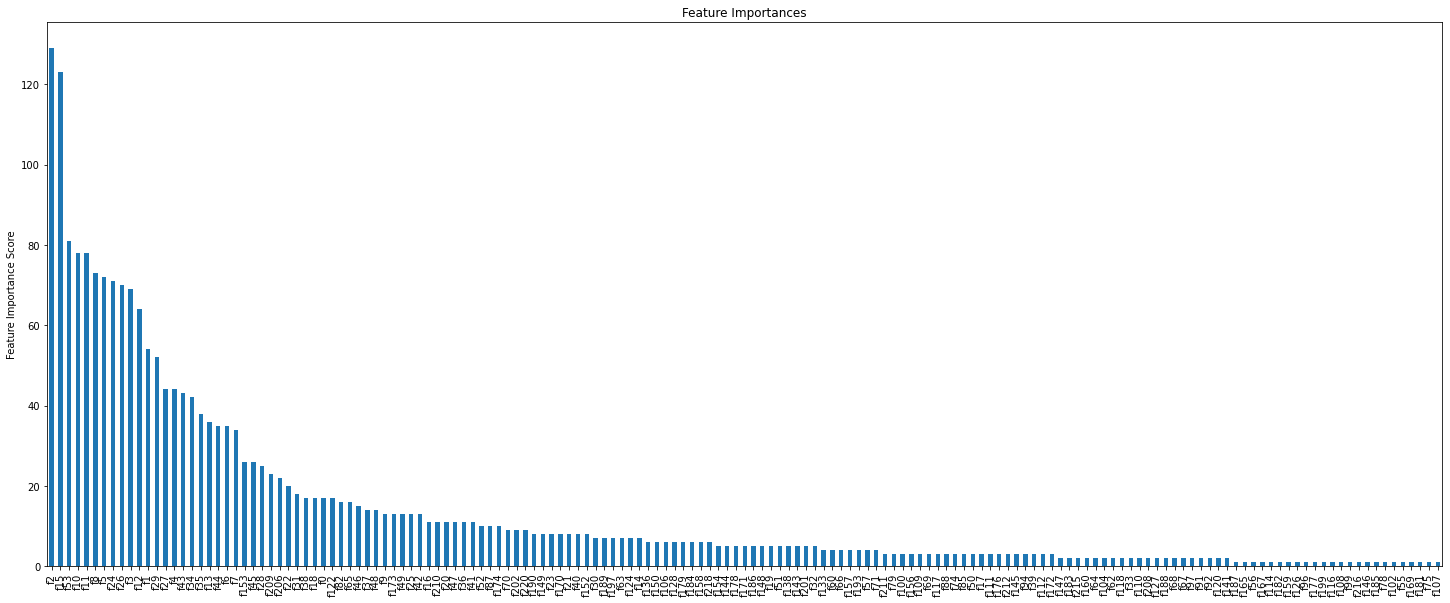

In [0]:
plt.figure(figsize=(25,10))
xgbr4.fit(X_train4, y_train4)
feat_imp = pd.Series(xgbr4.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

It appears that finally, 366 trees performs better than having 300. 

Thus, here is a recap of the parameters we decided to keep until now: 
- n_estimators=366 
- max_depth=3
- min_child_weight=3
-gamma=0

#### 2.2.d _Step 4: Tune subsample and colsample_bytree_

The last parameters that should be tuned are the subsample parameter and the colsample_bytree parameters. 

As for the Step 2, let's first try a wide range of values. 

In [0]:
param_test5 = {'subsample':[0.6, 0.7, 0.8, 0.9], 'colsample_bytree':[0.6, 0.7, 0.8, 0.9]}

xgboost5 = XGBRegressor(learning_rate =0.1, n_estimators=300, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27)

start_time = time.time()
gsearch5 = GridSearchCV(estimator = xgboost5, 
 param_grid = param_test5, scoring='neg_root_mean_squared_error',n_jobs=4,iid=False, cv = 5)
gsearch5.fit(X_train4, y_train4)
print(time.time() - start_time)

102.68494129180908


In [0]:
print('Best Score: ', gsearch5.best_score_)
print('Best Params: ', gsearch5.best_params_)

Best Score:  -0.11882486538604212
Best Params:  {'colsample_bytree': 0.8, 'subsample': 0.8}


We can see that the best values to choose are 0.8 for substample, and 0.8 too for colsample_bytree. Let's know take a smaller range for more precision.

In [0]:
param_test6 = {'subsample':[0.75, 0.80, 0.85], 'colsample_bytree':[0.75, 0.80, 0.85]}

xgboost6 = XGBRegressor(learning_rate =0.1, n_estimators=300, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27)

start_time = time.time()
gsearch6 = GridSearchCV(estimator = xgboost6, 
 param_grid = param_test6, scoring='neg_root_mean_squared_error',n_jobs=4,iid=False, cv = 5)
gsearch6.fit(X_train4, y_train4)
print(time.time() - start_time)

58.634567975997925


In [0]:
print('Best Score: ', gsearch6.best_score_)
print('Best Params: ', gsearch6.best_params_)

Best Score:  -0.11835372606541861
Best Params:  {'colsample_bytree': 0.75, 'subsample': 0.8}


The best score is now 0.11835372, obtained with colsample_bytree = 0.75 and subsample = 0.8. Let's tune the last parameters to see if the results can be improved. 

#### 2.2.e _Step 5: Tuning Regularization Parameters_

This step consists in applying regularization to reduce overfitting by tuning reg_alpha parameter. 

In [0]:
param_test7 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

xgboost7 = XGBRegressor(learning_rate =0.1, n_estimators=300, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.75,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27)

start_time = time.time()
gsearch7 = GridSearchCV(estimator = xgboost6, 
 param_grid = param_test7, scoring='neg_root_mean_squared_error',n_jobs=4,iid=False, cv = 5)
gsearch7.fit(X_train4, y_train4)
print(time.time() - start_time)

33.02446508407593


In [0]:
result = pd.DataFrame(gsearch7.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.019196,0.221236,0.012574,0.006842,1e-05,{'reg_alpha': 1e-05},-0.113438,-0.119644,-0.134658,-0.107087,-0.118864,-0.118738,0.009145,1
1,5.031679,0.137244,0.009306,0.004240,0.01,{'reg_alpha': 0.01},-0.114531,-0.121030,-0.135153,-0.107967,-0.118848,-0.119506,0.009005,2
2,5.083358,0.053830,0.013428,0.004754,0.1,{'reg_alpha': 0.1},-0.118128,-0.120940,-0.133281,-0.107694,-0.119390,-0.119887,0.008155,3
3,5.061533,0.095256,0.011093,0.006199,1,{'reg_alpha': 1},-0.119081,-0.123628,-0.134045,-0.107989,-0.124423,-0.121833,0.008465,4
4,2.656319,0.825443,0.004316,0.001610,100,{'reg_alpha': 100},-0.284477,-0.301246,-0.320766,-0.267033,-0.285390,-0.291782,0.018091,5


We have to favor a small standard deviation to avoid overfitting. For that, we are going to chose the reg_alpha parameter equals to 0.1, even if the RMSE is worse than before (0.1198). Let's focus on the values near 0.1. 

In [0]:
param_test8 = {'reg_alpha':[0.05, 0.1, 0.25, 0.5, 0.75]}

xgboost8 = XGBRegressor(learning_rate =0.1, n_estimators=300, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.75,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27)

start_time = time.time()
gsearch8 = GridSearchCV(estimator = xgboost6, 
 param_grid = param_test8, scoring='neg_root_mean_squared_error',n_jobs=4,iid=False, cv = 5)
gsearch8.fit(X_train4, y_train4)
print(time.time() - start_time)

33.785202741622925


In [0]:
pd.DataFrame(gsearch8.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.163181,0.079234,0.011722,0.004577,0.05,{'reg_alpha': 0.05},-0.115890,-0.119404,-0.136064,-0.104517,-0.120124,-0.119200,0.010118,1
1,5.152199,0.135306,0.009433,0.003159,0.1,{'reg_alpha': 0.1},-0.118128,-0.120940,-0.133281,-0.107694,-0.119390,-0.119887,0.008155,2
2,5.253368,0.183423,0.014057,0.006966,0.25,{'reg_alpha': 0.25},-0.117685,-0.120463,-0.136706,-0.107280,-0.124152,-0.121257,0.009548,3
3,5.007851,0.235517,0.006399,0.002072,0.5,{'reg_alpha': 0.5},-0.114764,-0.122668,-0.137038,-0.109569,-0.122271,-0.121262,0.009283,4
4,4.426289,1.398206,0.008426,0.004952,0.75,{'reg_alpha': 0.75},-0.113323,-0.125459,-0.142015,-0.110125,-0.122912,-0.122767,0.011196,5


To keep a good RMSE while a small standard deviation (to avoid overfiting), we will chose to keep reg_alpha = 0.05.

#### 2.2.f. _Step 6: Reducing Learning Rate_

Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do the job again.

In [0]:
# Our model with some parameters
xgbr9 = XGBRegressor(learning_rate =0.01, n_estimators=5000, max_depth=3, min_child_weight=3, gamma=0, subsample=0.75, colsample_bytree=0.8, reg_alpha=0.05, objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)

# Using the cv function to determine the optimal number of trees to choose
xgb_param = xgbr9.get_xgb_params()
xgtrain = DMatrix(X_train4_pd.values, label=y_train4_pd.values, feature_names = feature_names.values)
cvresult = cv(xgb_param, xgtrain, num_boost_round = xgbr9.get_params()['n_estimators'], nfold = 5, metrics='rmse', early_stopping_rounds = 50)
xgbr9.set_params(n_estimators=cvresult.shape[0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=2701,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.75, verbosity=1)

By lowering the learning rate (0.01) and keeping the optimal parameters we found before, the new optimal number of trees is 2701. Let's try a cross validation on the XGBoost algorithm with the final parameters to see if it performs well. 

In [0]:
# Our model with some parameters
xgbr10 = XGBRegressor(learning_rate =0.01, n_estimators=2701, max_depth=3, min_child_weight=3, gamma=0, subsample=0.75, colsample_bytree=0.8, reg_alpha=0.05, objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)
xgbr10.fit(X_train4, y_train4)
scores_xgbr = cross_val_score(xgbr10, X_train4, y_train4, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE on a 5-fold cross-validation:', np.mean(scores_xgbr))

RMSE on a 5-fold cross-validation: -0.11726461418506226


In [0]:
# Our model with some parameters
xgbr9 = XGBRegressor(learning_rate =0.01, n_estimators=5000, max_depth=3, min_child_weight=3, gamma=0, subsample=0.75, colsample_bytree=0.8, objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)

# Using the cv function to determine the optimal number of trees to choose
xgb_param = xgbr9.get_xgb_params()
xgtrain = DMatrix(X_train4_pd.values, label=y_train4_pd.values, feature_names = feature_names.values)
cvresult = cv(xgb_param, xgtrain, num_boost_round = xgbr9.get_params()['n_estimators'], nfold = 5, metrics='rmse', early_stopping_rounds = 50)
xgbr9.set_params(n_estimators=cvresult.shape[0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=3099,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.75, verbosity=1)

In [0]:
# Our model with some parameters
xgbr11 = XGBRegressor(learning_rate =0.01, n_estimators=3099, max_depth=3, min_child_weight=3, gamma=0, subsample=0.75, colsample_bytree=0.8, objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)
xgbr11.fit(X_train4, y_train4)
scores_xgbr = cross_val_score(xgbr11, X_train4, y_train4, cv=5, scoring='neg_root_mean_squared_error')
print('RMSE on a 5-fold cross-validation:', np.mean(scores_xgbr))

RMSE on a 5-fold cross-validation: -0.11725750499584112


## 3. Random Forest

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### 3.1. Data Importation

For n_features = 75

In [0]:
n_features = '75'

Remark : If you want to change the data set, you just have to change the value of n_features between : 
- '47'
- '75'
- '138'
- 'all'

No need to change the code below!

In [0]:
data_train = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features + '/data_train_' +n_features+  '.csv', delimiter=',')
data_test = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features + '/data_test_' + n_features +  '.csv', delimiter=',')

In [0]:
data_train = data_train.drop(['Unnamed: 0'],axis=1)
data_test = data_test.drop(['Unnamed: 0'],axis=1)

Separation between testing and validation sets (if needed) :

In [0]:
#data_train = data_train.iloc[0:938,:]
#data_valid  = data_train.iloc[938:1189,:]

Separation between inputs (X) and outputs (y)

In [0]:
X_train =  data_train.drop(['logSalePrice'],axis=1)
X_test =  data_test.drop(['logSalePrice'],axis=1)
#X_valid = data_valid.drop(['logSalePrice'],axis=1)

y_train = pd.DataFrame(data_train['logSalePrice'])
y_test = pd.DataFrame(data_test['logSalePrice'])
#y_valid = pd.DataFrame(data_valid['logSalePrice'])

y_train = np.ravel(y_train)


### 3.2 Random forest

In this section we are going to build a regression model with the Random forest algorithm for our problem which is to predict the sale price of houses given a training set.

As many ML algorithms, Random Forest has hyperparameters that need to be tuned in order to achieve the best possible performances.

Our metrics for performance/model evaluation will be the RMSE between the log of the predicted value and the log of the test value. We will also have a look at the R^2 score which answer the question : is our regression model better than a simple average model ? The R2 score is defined as 1 — (Error from Linear Regression Model/Simple average model) so the best possible score for R2 is 1.

see also : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html


First we are going to test a Random Forest on our data set with the default parameters (namely without parameter tuning). Then we are going to find a range where each of these hyperparameters lay with Random Search which will narrow down our research. Eventually, we are going to resort to Grid Search to test all the combinations of the values hyperparameters we will set to finally have the best combination of hyperparameters.

The following hyperparameters will be considered : 
- n_estimator which is the number of trees
- max_features which is the number of features to consider when looking for the best split
- max_depth which is the  maximum depth of the trees.


#### 3.2.1 Baseline model : no parameter tuning

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

To have a baseline, we will simply use all the data and no hyperparameter tuning. We will test this "baseline model" on 4 datasets (one with 47 features, one with 75 features, one with 138 features and one with all the features) and keep the dataset resulting in the best RMSE for our next experiments.

In [0]:
#preparing the model
model_baseline = RandomForestRegressor(random_state = 1)

#5-fold cross validation
rmse_baseline = cross_val_score(model_baseline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_baseline = cross_val_score(model_baseline, X_train, y_train, cv=5, scoring='r2')


#results
print('### Model Performance without parameter tuning ###')
print('')
print('RMSE', -np.mean(rmse_baseline))
print('R^2', np.mean(r2_baseline))

### Model Performance without parameter tuning ###

RMSE 0.13951440664338258
R^2 0.8781415565216222


In [0]:
#results with all the possible numbers of features 

data = [[0.13972105590404055, 0.8778538488367701], [0.13951440664338258, 0.8781415565216222],[0.13992787456959166, 0.8775439458002168],[0.13952331938418322, 0.878207978012709]]
results = pd.DataFrame(data, columns=['RMSE', 'R^2'], index=['47 features', '75 features', '138 features', 'all features'])

results

,RMSE,R^2
47 features,0.139721,0.877854
75 features,0.139514,0.878142
138 features,0.139928,0.877544
all features,0.139523,0.878208


We keep the dataset that gives the lowest RMSE namely the one with **75 features**. Indeed, more accurately, the RMSE is equal to 0.139514 compared to 0.139523 for the dataset with all features. Even if the difference is really small and somewhat arbitrary, we will keep 75 features to have smaller computational times.

**By default**, the parameters are set to : **n_estimators = 100**, max_features = 'auto' (which is sqrt) and max_depth = None namely there is no maximum depth for the tree.

We will try to tune these parameters to achieve better performance. To do so, we will use the Grid Search tool to optimize the following hyperparameters : n_estimators , max_features  and max_depth as said in the introduction.

Indeed, these n_estimators and max_depth features are the most important setting according to the documentation on the random forest in Scikit-Learn. We could choose many other hyperparameters obviously such as min_samples_split, min_samples_leaf, min_weight_fraction_leaf= etc.

#### 3.2.2 Parameter tuning using Random Search 

At first, we don't know the order of magnitude for each parameters so we are going to run a Random Search to have an approximate idea of where to search for the parameter tuning with Grid Search later on.

We give intervals/values for each parameter and Random Search will randomly pick some values for the parameters and then test the associated models.

In [0]:
from sklearn.model_selection import RandomizedSearchCV

#initializing n_estimators parameter
n_estimators = [int(x) for x in np.linspace(1, 1500, num = 10)]

#initializing n_estimators parameter
max_features = ['log2', 'sqrt']

#initializing max_depth parameter
max_depth = [int(x) for x in np.linspace(1, 1000, num = 10)]

Then we create the grid that will be used in the Random Search object

In [0]:
#random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }
random_grid

{'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000],
 'max_features': ['log2', 'sqrt'],
 'n_estimators': [1, 167, 334, 500, 667, 833, 1000, 1166, 1333, 1500]}

Not all these 338 (13 x 13 x 2) combinations are going to be tested but only few of them.

In [0]:
#creating our model to tune
rf = RandomForestRegressor()

#we search amongst n_iter = 100 combinations (out of 338) with 5-fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=3, n_jobs = -1)

#we then fit the model
rf_random.fit(X_train, y_train)

#then we can display the best parameters after fitting the model 
rf_random.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  9.6min finished


{'max_depth': 667, 'max_features': 'sqrt', 'n_estimators': 833}

Now the question is : do we achieved better perfomance than our baseline model ? 

In [0]:
#creating the model with the "random" tuned parameters : n_estimators = 833, max_depth=667, max_features='sqrt'

from numpy.random import seed
seed(1)

model_random = RandomForestRegressor(n_estimators = 833, max_depth=667, max_features='sqrt')


#5-fold cross validation
rmse_random = cross_val_score(model_random, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_random = cross_val_score(model_random, X_train, y_train, cv=5, scoring='r2')


#results
print('### Model Performance with Random Search tuning ###')
print('')
print('RMSE', -np.mean(rmse_random))
print('R^2', np.mean(r2_random))


### Model Performance with Random Search tuning ###

RMSE 0.13859073976218
R^2 0.8798858253600091


We can notice that the performance (in terms of MSE) is approximately the same than without parameter tuning. Indeed, we have now a RMSE equal to **0.1386** instead of 0.1395. It is a little bit better but nothing significant.

#### 3.2.3. Parameter tuning using Grid Search

Now that we have an order of magnitude for each of the parameters (max_depth ≈ 667, max_features = sqrt, n_estimators ≈ 833) we want to tune them using Grid Search to optimize our hyperparameters.

reference site : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
y_train = np.ravel(y_train)

#initializing the parameters values we want to test

param_grid = {
            'max_depth': (500, 550, 600, 650, 700, 750, 800),
            'max_features': ['sqrt'],
            'n_estimators': (750, 800, 850, 880, 900, 950),
            }

#the next step is to build the 25 models (len(max_depth)*len(n_estimators)*len(max_features) = 25) 
#and to train them and asses them via K-fold cross validation (K = cv = 4)

gsc = GridSearchCV(estimator=RandomForestRegressor(random_state=2),param_grid = param_grid,
        cv=4, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)

print('#######     FINI    ######')

#######     FINI    ######


In [0]:
#we now display the parameters found by Grid Search that minized the performance metrics
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

print('best params =>', best_params)
print('best estimator =>', best_model) #display the best configuration for the random forest 

best params => {'max_depth': 500, 'max_features': 'sqrt', 'n_estimators': 950}
best estimator => RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=500, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=950, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)


Now that we have the best parameters found by Grid Search (**max_depth = 500**, **n_estimator = 950**, **max_features = 'sqrt'**) we create our Random Forest with those parameters and test the model with 10-fold cross validation to assess its perfomances in terms of RMSE and accuracy.

To asses our model, instead of running it on the training set and testing it on the testing set, we perfom K-fold cross validation. This will gives us K RMSE (metrics for performance assessment) and the final RMSE of the model will be the average of the RMSE of each fold.

In [0]:
from numpy.random import seed
#seed(2)

# instanciating a new Random Forest with the tuned parameters

model_gridsearch = RandomForestRegressor(n_estimators = 950, max_depth=500, max_features='sqrt')

# performing K-Fold Cross Validation with K = 5

mse_gridsearch = cross_val_score(model_gridsearch, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_gridsearch = cross_val_score(model_gridsearch, X_train, y_train, cv=5, scoring='r2')

print('RMSE', -np.mean(mse_gridsearch))
print('R^2', np.mean(r2_gridsearch))


RMSE 0.1382936198206818
R^2 0.8798402407678447



- The RMSE of the model is the average of the RMSE of each fold.
- The R2-score of the model is the average of the R2-scores of each fold.
- With the GridSearch-tuned parameters , the RMSE is better than before : we got **0.1383** instead of 0.1395 and 0.1396 previously even if it makes no big difference. So Grid Search was not totally helpful in improving the model.

### 3.3 Conclusion

With n_features = 75

In [0]:
data = [[0.1395, '0.878', '100', 'None', 'auto(=sqrt)'], [0.1386, '0.879', '883', '667', 'sqrt'],[0.1383, '0.880', '20', '15', 'sqrt']]
results = pd.DataFrame(data, columns=['RMSE', 'R^2', 'n_estimators', 'max_depth', 'max_features'], index=['Baseline model', 'Random Search model', 'Grid Search model'])

results

,RMSE,R^2,n_estimators,max_depth,max_features
Baseline model,0.1395,0.878,100,None,auto(=sqrt)
Random Search model,0.1386,0.879,883,667,sqrt
Grid Search model,0.1383,0.880,20,15,sqrt


Conclusion :

- The performance of the model in terms of RMSE and R^2 coefficient are better after executing a Grid Search compared to a simple Random Search or a baseline model (with default parameters). But the improvement is really small ( the gain in RMSE is around 0.1%).

- However, the quest for performance comes with a cost : the computational cost of a Grid Search to test all combinations of the provided hyperparameters is higher than just using a Random Forest with default parameters.



## 4. Neural Networks

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### 4.1. Data Importation

For n_features = 75

In [0]:
n_features = '75'

Remark : If you want to change the data set, you just have to change the value of n_features between : 
- '47'
- '75'
- '138'
- 'all'

No need to change the code below!

In [0]:
data_train = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features + '/data_train_' +n_features+  '.csv', delimiter=',')
data_test = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features + '/data_test_' + n_features +  '.csv', delimiter=',')

In [0]:
data_train = data_train.drop(['Unnamed: 0'],axis=1)
data_test = data_test.drop(['Unnamed: 0'],axis=1)

Separation between testing and validation sets (if needed) :

In [0]:
#data_train = data_train.iloc[0:938,:]
#data_valid  = data_train.iloc[938:1189,:]

Separation between inputs (X) and outputs (y)

In [0]:
X_train =  data_train.drop(['logSalePrice'],axis=1)
X_test =  data_test.drop(['logSalePrice'],axis=1)
#X_valid = data_valid.drop(['logSalePrice'],axis=1)

y_train = pd.DataFrame(data_train['logSalePrice'])
y_test = pd.DataFrame(data_test['logSalePrice'])
#y_valid = pd.DataFrame(data_valid['logSalePrice'])


In [0]:
y_train = np.ravel(y_train)


### 4.2 Neural Nets 

First we are going to create a simple neural net, run it with the default parameters (or most common parameters as there is no 'default' values for each parameters) and then assess its performance through RMSE metrics.

Then we are going to tune different parameters using Grid Search (same tool as done in Random Forest)
The parameters we are going to tune are : 

- batch_size which is the size of the batches that are going to pass through the neural network
- n_epoch which is the number of time all training data are going to pass (backward and forward) through the network
- optimizer which is the optimization algorithm
- weight_init which is the distribution we use to initialize the weights
- activation function
- number of neurons in hidden layers. We decided to build a simple neural network with 2 layers.

We have to make a choice : tuning the 6 parameters one by one or choosing 2 or 3 parameters (max) to tune them in parallel. Indeed, Neural Networks are known to be slow to train so tuning 6 parameters in parallel will be really slow (we tested this option and it has not converged in 15 hours). We will tune the parameters one by one. 

We will use the Keras library to build our Neural Network.

reference sites :
- https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

- https://medium.com/@am.benatmane/keras-hyperparameter-tuning-using-sklearn-pipelines-grid-search-with-cross-validation-ccfc74b0ce9f

- https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/

#### 4.2.1 Baseline model : no parameters/hyperparameters optimization

Reading the litterature, we can consider that the default values for hyperparameters (batch_size, n_epoch) learning_rate  are : 
Generally batch size of 32 or 10 is "good", with epochs = 100 (if the data set is not too large)

NB: what is good ? we don't care because it is just a starting point, we will optimize the parameters later with Grid Search tuning.

In [0]:
#imports 

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor


There is no default values for the parameters 'loss' and 'optimizer' passed in the compile function so we arbitrarly choose a the mse loss and the Adam optimizer. Same for the number of neurons.

In [0]:
from numpy.random import seed
import sklearn.metrics

#for reproductability 
seed(3)

input_dim = X_train.shape[1] 

#building the model 

def create_model_baseline():

  model_baseline = Sequential()
  model_baseline.add(Dense(64, input_dim = input_dim, activation='relu')) #we use Dense to create a fully connected layer
  model_baseline.add(Dense(32, activation = 'relu'))
  model_baseline.add(Dense(1, activation = 'linear')) 

  #compiling the model
  model_baseline.compile(optimizer='Adam', loss ='mse')

  return model_baseline

In [0]:
# Wrapping Keras model so it can be used by scikit-learn

model_baseline = KerasRegressor(build_fn=create_model_baseline, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

In [0]:
from sklearn.metrics import mean_squared_error

#5-fold cross validation
rmse_baseline = cross_val_score(model_baseline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_baseline = cross_val_score(model_baseline, X_train, y_train, cv=5, scoring='r2')


#results
print('### Model Performance without parameter tuning ###')
print('')
print('RMSE', -np.mean(rmse_baseline))
print('R^2', np.mean(r2_baseline))

### Model Performance without parameter tuning ###

RMSE 27.822584018494744
R^2 -11484.322879948108


In [0]:
#results with all the possible numbers of features 

data = [[39.760680025331055, -28449.12481171448], [27.822584018494744, -11484.322879948108],[29.206593464422287, -3583.9623001342707],[36.032621277696, -8428.635461529453]]
results = pd.DataFrame(data, columns=['RMSE', 'R^2'], index=['47 features', '75 features', '138 features', 'all features'])

results

,RMSE,R^2
47 features,39.760680,-28449.124812
75 features,27.822584,-11484.322880
138 features,29.206593,-3583.962300
all features,36.032621,-8428.635462


Without tuning and optimizing any parameter we obtained a RMSE equal to **27.82** for 75 features. As we can see the R2 score is negative which means that the model is particularly poor. This is the smaller RMSE so we keep 75 features for the next experiments. This number of features will also enable smaller computational times. Let us see if we can do better in terms of RMSE.


#### 4.2.2 Parameter tuning using Grid Search

As said in the introduction, we are going to tune the parameters one by one and each time re-using the tuned parameters to feed the next Grid Search process.

In [0]:
import keras
from sklearn.model_selection import GridSearchCV

#### 4.2.3 Tuning batch size and n_epoch

In [0]:
# creating a function to put it in argument of KerasRegressor in Grid Search

def create_model_batch_epoch(): 

    # create model
    model = Sequential()
    model.add(Dense(64, input_dim = input_dim, activation='relu')) 
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'linear')) 

    # Compile model
    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [0]:
# hyperparameters to be tuned : creating our grid 
param_grid_batch_epoch = {
    'epochs': [50, 100, 120, 150, 200],
    'batch_size':[5, 10, 16, 20, 32, 50],
}       

In [0]:
model_batch_epoch = KerasRegressor(build_fn=create_model_batch_epoch, verbose = 0) 

gsc = GridSearchCV(estimator = model_batch_epoch, param_grid = param_grid_batch_epoch,
        cv=4, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)

print('#######     FINI    ######')

print('Best model', -grid_result.best_score_,'best parameters', grid_result.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


#######     FINI    ######
Best model 0.36622633761732193 best parameters {'batch_size': 5, 'epochs': 200}


In [0]:
#results
print('Best MSE', -grid_result.best_score_,'best parameters', grid_result.best_params_)
means = -grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best MSE 0.36622633761732193 best parameters {'batch_size': 5, 'epochs': 200}
1345.905910 (1278.810499) with: {'batch_size': 5, 'epochs': 50}
9.307658 (15.003189) with: {'batch_size': 5, 'epochs': 100}
1.364980 (1.668077) with: {'batch_size': 5, 'epochs': 120}
9.061138 (14.624770) with: {'batch_size': 5, 'epochs': 150}
0.366226 (0.304488) with: {'batch_size': 5, 'epochs': 200}
421.425936 (397.244702) with: {'batch_size': 10, 'epochs': 50}
55.617005 (48.140498) with: {'batch_size': 10, 'epochs': 100}
20.798248 (19.013245) with: {'batch_size': 10, 'epochs': 120}
60.330269 (83.452605) with: {'batch_size': 10, 'epochs': 150}
3.674344 (4.236450) with: {'batch_size': 10, 'epochs': 200}
1192.151447 (1186.745485) with: {'batch_size': 16, 'epochs': 50}
95.045499 (52.840829) with: {'batch_size': 16, 'epochs': 100}
127.628784 (192.817488) with: {'batch_size': 16, 'epochs': 120}
22.545108 (21.902374) with: {'batch_size': 16, 'epochs': 150}
90.490235 (139.293556) with: {'batch_size': 16, 'epochs': 

We can see that we obtained the best performances for batch_size = 5 and n_epoch = 200. 

Once we have tuned these parameters what about the RMSE : did it improve ? Let us check with 5-fold cross validation

In [0]:
#5-fold cross validation

model_tuned_step1 = KerasRegressor(build_fn=create_model, batch_size = 5, epochs = 200, verbose = 0)

rmse_tuned_step1 = cross_val_score(model_tuned_step1, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_tuned_step1 = cross_val_score(model_tuned_step1, X_train, y_train, cv=5, scoring='r2')


#results
print('### Model Performance without parameter tuning ###')
print('')
print('RMSE', -np.mean(rmse_tuned_step1))
print('R^2', np.mean(r2_tuned_step1))

### Model Performance without parameter tuning ###

RMSE 0.8248519932000551
R^2 0.38968806144047796


We improve our RMSE: now it is equal to **0.825** whereas before it was equal to 27.82 just by changing the number of epochs (from 100 to 200) and the batch size (from 10 to 5).

#### 4.2.4 tuning the optimization algorithm

In [0]:
# creating a function to put it in argument of KerasRegressor in Grid Search

def create_model_optimizer(optimizer='adam'):


    # create model
    model = Sequential()
    model.add(Dense(64, input_dim = input_dim, activation='relu')) 
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'linear')) 

    # compile model
    model.compile(loss='mse', 
                  optimizer=optimizer, 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [0]:
model_optimizer = KerasRegressor(build_fn=create_model_optimizer, batch_size = 5, epochs = 200, verbose = 0) 

In [0]:
#creating the search grid

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_optimizer, param_grid=param_grid, n_jobs=-1, cv=3)

In [0]:
grid_result = grid.fit(X_train, y_train)

# results
print('Best MSE', -grid_result.best_score_ ,'best parameters', grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best MSE 28.093287357383975 best parameters {'optimizer': 'Adam'}
nan (nan) with: {'optimizer': 'SGD'}
-46.825173 (65.950398) with: {'optimizer': 'RMSprop'}
-64.024803 (33.367883) with: {'optimizer': 'Adagrad'}
-286.745761 (360.405908) with: {'optimizer': 'Adadelta'}
-28.093287 (39.348833) with: {'optimizer': 'Adam'}
-1769.048012 (1550.227700) with: {'optimizer': 'Adamax'}
-94.772154 (133.623415) with: {'optimizer': 'Nadam'}


We will keep **Adam** optimization algorithm for the futur experiments with its default parameters set by Keras :  learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07. We could choose to tune these hyperparameters but we will focus on the ones that have been chosen. 

#### 4.2.5 Tuning the number of neurons in 2 two hidden layers 

In [0]:
# creating a function to put it in argument of KerasRegressor in Grid Search

def create_model_neurons(neurons_1 = 1, neurons_2 = 1):
    # default values
    activation='relu' 
    optimizer = 'Adam'

    # create model
    model = Sequential()
    model.add(Dense(neurons_1, input_dim = input_dim, activation=activation)) 
    model.add(Dense(neurons_2, activation = activation))
    model.add(Dense(1, activation = 'linear')) 

    # Compile model
    model.compile(loss='mse', 
                  optimizer=optimizer, 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [0]:
model_neurons = KerasRegressor(build_fn=create_model_neurons, batch_size = 5, epochs = 200, verbose = 0) 

In [0]:
neurons_1 = [5, 10, 20, 40]
neurons_2 = [5, 10, 20, 40]
param_grid = dict(neurons_1 = neurons_1, neurons_2 = neurons_2)
grid = GridSearchCV(estimator=model_neurons, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [0]:
# results
print('Best MSE', -grid_result.best_score_ ,'best parameters', grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best MSE 0.08457277265643898 best parameters {'neurons_1': 10, 'neurons_2': 5}
-0.085429 (0.048330) with: {'neurons_1': 5, 'neurons_2': 5}
-501.375008 (708.822632) with: {'neurons_1': 5, 'neurons_2': 10}
-0.338182 (0.290562) with: {'neurons_1': 5, 'neurons_2': 20}
-1.200092 (1.465209) with: {'neurons_1': 5, 'neurons_2': 40}
-0.084573 (0.045950) with: {'neurons_1': 10, 'neurons_2': 5}
-0.162923 (0.140382) with: {'neurons_1': 10, 'neurons_2': 10}
-26.462090 (37.125223) with: {'neurons_1': 10, 'neurons_2': 20}
-109.373832 (153.787519) with: {'neurons_1': 10, 'neurons_2': 40}
-78.516647 (110.810395) with: {'neurons_1': 20, 'neurons_2': 5}
-22.749059 (32.042999) with: {'neurons_1': 20, 'neurons_2': 10}
-12.546148 (17.255150) with: {'neurons_1': 20, 'neurons_2': 20}
-174.764666 (247.061177) with: {'neurons_1': 20, 'neurons_2': 40}
-0.188427 (0.031922) with: {'neurons_1': 40, 'neurons_2': 5}
-5.641827 (7.792109) with: {'neurons_1': 40, 'neurons_2': 10}
-55.091599 (77.618837) with: {'neurons_1

The Grid Search algorithm tested all the combinations for the nunmbers of neurons and found that **{'neurons_1': 10, 'neurons_2': 5}** was the solution that minimized the loss. We are going to keep this configuration.

#### 4.2.6 Tuning the activation function

In [0]:
# creating a function to put it in argument of KerasRegressor in Grid Search

def create_model_activation(activation = 'relu'):

    # create model
    model = Sequential()
    model.add(Dense(10, input_dim = input_dim, activation=activation)) 
    model.add(Dense(5, activation = activation))
    model.add(Dense(1, activation = 'linear')) 

    # Compile model
    model.compile(loss='mse', 
                  optimizer='Adam', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [0]:
model_activation = KerasRegressor(build_fn=create_model_activation, batch_size = 5, epochs = 200, verbose = 0) 

In [0]:
activation =  ['softmax', 'softsign', 'relu', 'elu', 'selu']

param_grid = dict(activation = activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=-1, cv=3)


In [0]:
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.082511 using {'activation': 'softsign'}
-0.160085 (0.010711) with: {'activation': 'softmax'}
-0.082511 (0.010129) with: {'activation': 'softsign'}
-0.127301 (0.056247) with: {'activation': 'relu'}
-2.518253 (3.048670) with: {'activation': 'elu'}
-0.166102 (0.006789) with: {'activation': 'selu'}


Ok let us use softsign

#### 4.2.7 Tuning weights initialization

In [0]:
# creating a function to put it in argument of KerasRegressor in Grid Search

def create_model_weights(init_mode='uniform'):
    # default values
    activation='softsign' 
    optimizer = 'Adam'

    # create model
    model = Sequential()
    model.add(Dense(10, kernel_initializer=init_mode, input_dim = input_dim, activation=activation)) 
    model.add(Dense(5, kernel_initializer=init_mode, activation = activation))
    model.add(Dense(1, activation = 'linear')) 

    # Compile model
    model.compile(loss='mse', 
                  optimizer=optimizer, 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


In [0]:
model_weights = KerasRegressor(build_fn=create_model_weights, batch_size = 5, epochs = 200, verbose = 0) 

In [0]:
init_mode = ['uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=model_weights, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.070461 using {'init_mode': 'uniform'}
-0.070461 (0.005738) with: {'init_mode': 'uniform'}
-0.071464 (0.012684) with: {'init_mode': 'normal'}
-0.160993 (0.010132) with: {'init_mode': 'zero'}
-0.084269 (0.004631) with: {'init_mode': 'glorot_normal'}
-0.078890 (0.017042) with: {'init_mode': 'glorot_uniform'}
-0.076646 (0.012612) with: {'init_mode': 'he_normal'}
-0.085940 (0.005777) with: {'init_mode': 'he_uniform'}


best weight initialization : **{'init_mode': 'uniform'}**

#### 4.2.8 Model evaluation

k-fold cv with the tuned parameters (init_mode = uniform, optimizer = 'Adam', activation. = 'softsign', neurons_1 = 10, neurons_2 = 5)

In [0]:
# instanciating a new neural net with the tuned parameters
from sklearn.model_selection import cross_val_score

def create_model_final():

    # create model
    model = Sequential()
    model.add(Dense(10, kernel_initializer='uniform', input_dim = input_dim, activation='softsign')) 
    model.add(Dense(5,kernel_initializer='uniform', activation = 'softsign'))
    model.add(Dense(1, activation = 'linear')) 

    # Compile model
    model.compile(loss='mse', 
                  optimizer='Adam', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model_final = KerasRegressor(build_fn=create_model_final, batch_size = 5, epochs = 200, verbose = 0) 

# performing K-Fold Cross Validation with K = 10

scores_mse = cross_val_score(model_final, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print('RMSE', -np.mean(scores_mse))

RMSE 0.25948933966460735


Finally we got a RMSE equal to **0.259** (instead of 0.139 for Random Forest) but we can clearly see that tuning the parameters enabled us to improve the RMSE which was equal to 27.82 without any parameter tuning and then 0.825 after batch_size and n_epochs tuning).
Obviously tuning the parameters one by one is questionable but we did that for computational time reasons and to be able to tune as much parameters as we could (and the most common) because Neural Network is a structure that have so many (hyper)parameters.


#### 4.2.9 results on test set


In [0]:
from sklearn.metrics import mean_squared_error

model_final.fit(X_train, y_train)
y_pred = model_final.predict(X_test)

R2_NN = sklearn.metrics.r2_score(y_test, y_pred)
RMSE_NN = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print('R2 score =', R2_NN)
print('RMSE =', RMSE_NN)

R2 score = 0.5938283581345597
RMSE = 0.24213467621862392


## 5. Focus on ridge regression

### 5.1 _Hyperparameter tuning: Ridge Regression_

In [0]:
# Ridge regression with the default parameters
start_time = time.time()
ridge = Ridge()
score_ridge = cross_val_score(ridge, X_train3, y_train3, cv=5, scoring='neg_root_mean_squared_error')
print("--- %s seconds ---" % (time.time() - start_time))
print('Root mean squared error without any tuning:', -np.mean(score_ridge))

--- 0.04605889320373535 seconds ---
Root mean squared error without any tuning: 0.11867813984795232


The 2 main hyperparameters that can be tuned on the Ridge Regression are the *solver* and the *regularization parameter* alpa. Thus, doing a **Grid Search** on the regularization parameter alpha and the solver seems to be adapted to our problem. Our goal is to have a better result than the one obtained with the default values: 0.1187.

As the time of computation of the Ridge regression is very quick (46.1 ms with a 5-fold cross validation), we can try a large number of values for alpha and different solvers without spending too much time for the computation. 

In [0]:
n_alphas = 400
alphas = np.logspace(0.01, 10, n_alphas)

ridge = Ridge()
param_grid = {'alpha': alphas, 'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']}
grid_search_ridge2 = GridSearchCV(ridge, param_grid, scoring = 'neg_root_mean_squared_error', cv = 5)
grid_search_ridge2.fit(X_train3, y_train3)

In [0]:
best_param = grid_search_ridge2.best_params_
print('Best Score: ', grid_search_ridge2.best_score_)
print('Best Params: ', grid_search_ridge2.best_params_)

False
Best Score:  -0.11617237647295646
Best Params:  {'alpha': 8.153674749986953}


Thus, tuning the regularization parameter alpha and the solver thanks to a Grid Search allows us to conclude that the best alpha parameter is 8.15, and the best solver is 'Auto', as it leads to a root mean square error on a 5-fold cross-validation of **0.1162**, which is better than the one previously find with the default parameters.

Having a high regularization parameter is a good thing as when the value of alpha increases, the model complexity reduces. Thus, we can hope that this model would not lead to overfitting.

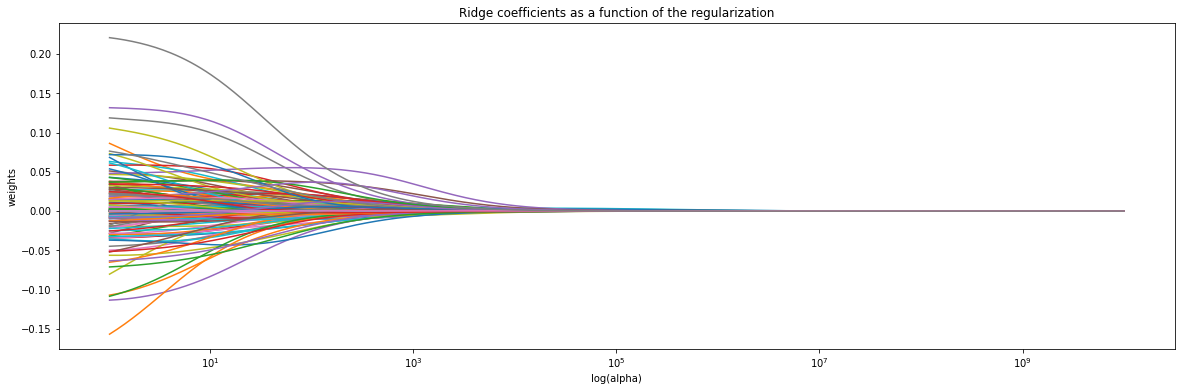

In [0]:
alphas = np.logspace(0.01, 10, 400)

# Train the model with different regularisation strengths
ridge_plot = Ridge()
coefs = []
errors = []
for a in alphas:
    ridge_plot.set_params(alpha=a)
    ridge_plot.fit(X_train3, y_train3)
    coefs.append(ridge_plot.coef_)
    if a == 8.153674749986953:
      print('Yes')
      
# Display results
plt.figure(figsize=(20, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('log(alpha)')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.show()

In [0]:
print(np.shape(coefs))

(400, 138)


We are working on the third dataset, so the one with 138 features. Thus, we have to optimize 138 coefficients. To see how those coefficients behave with respect to the regularization parameter alpha, we plotted them just above. 

We can see than the more alpha is small, the more the coefficient are large and thus can lead to overfitting. In our case, the best result is obtained with alpha = 8.15, which is a good thing as it is big enough to hope our model will not overfit. 

### 5.2 Go back into features selection

As Ridge Regression gave us the best results, we were interested in optimizing our algorithms studying with a recursive algorithm how many features will give us the best results. 

#### 5.2.1. Data importation

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [0]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
n_features = 'all'

In [0]:
data_train = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = ' + n_features + '/data_train_' +n_features+  '.csv', delimiter=',')
data_test = pd.read_csv('/content/drive/My Drive/House Pricing Prediction Challenge/Data/Features = '+ n_features + '/data_test_' + n_features +  '.csv', delimiter=',')

In [0]:
data_train = data_train.drop(['Unnamed: 0'],axis=1)
data_test = data_test.drop(['Unnamed: 0'],axis=1)

Let us first separate the inputs from the output.

In [0]:
X_train =  data_train.drop(['logSalePrice'],axis=1)
X_test =  data_test.drop(['logSalePrice'],axis=1)

y_train = pd.DataFrame(data_train['logSalePrice'])
y_test = pd.DataFrame(data_test['logSalePrice'])

#### 5.2.2 Ridge Algorithm

In [0]:
step = 10

In [0]:
x = np.arange(223,-10,-1*step)[::-1]

In [0]:
estimator_tuned_Iri = Ridge(alpha = 8.153674749986953,solver='auto')

# step : the number of features to remove at each iteration.
# scoring : Here, we want RMSE : 'neg_root_mean_squared_error'
rfecv_selector = RFECV(estimator=estimator_tuned_Iri, step = step, cv=5,scoring = 'neg_root_mean_squared_error')
rfecv_selector.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFECV(cv=5,
      estimator=Ridge(alpha=8.153674749986953, copy_X=True, fit_intercept=True,
                      max_iter=None, normalize=False, random_state=None,
                      solver='auto', tol=0.001),
      min_features_to_select=1, n_jobs=None,
      scoring='neg_root_mean_squared_error', step=10, verbose=0)

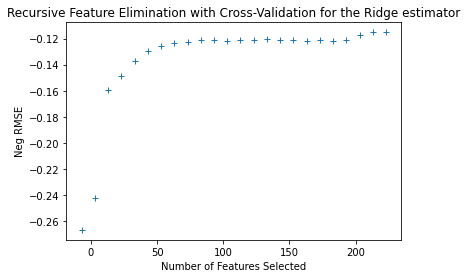

In [0]:
plt.title("Recursive Feature Elimination with Cross-Validation for the Ridge estimator")
plt.xlabel('Number of Features Selected')
plt.ylabel('Neg RMSE')
plt.plot(x, rfecv_selector.grid_scores_, '+')
plt.show()

In [0]:
rfecv_selector.n_features_

223

In [0]:
scores = pd.DataFrame(rfecv_selector.grid_scores_)

In [0]:
scores.describe()

,0
count,24.000000
mean,-0.135856
std,0.038087
min,-0.266687
25%,-0.126623
50%,-0.121547
75%,-0.121230
max,-0.115192


Let us now try to run between 213 and 223. 

In [0]:
step_2 = 1
x_2 = np.arange(213,224,1)

array([213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223])

In [0]:
rfecv_selector_2 = RFECV(estimator=estimator_tuned_Iri, step = 1, cv=5,scoring = 'neg_root_mean_squared_error',min_features_to_select = 213)
rfecv_selector_2.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFECV(cv=5,
      estimator=Ridge(alpha=8.153674749986953, copy_X=True, fit_intercept=True,
                      max_iter=None, normalize=False, random_state=None,
                      solver='auto', tol=0.001),
      min_features_to_select=213, n_jobs=None,
      scoring='neg_root_mean_squared_error', step=1, verbose=0)

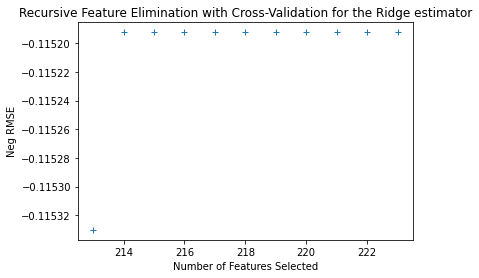

In [0]:
plt.title("Recursive Feature Elimination with Cross-Validation for the Ridge estimator")
plt.xlabel('Number of Features Selected')
plt.ylabel('Neg RMSE')
plt.plot(x_2, rfecv_selector_2.grid_scores_, '+')
plt.show()

In [0]:
rfecv_selector_2.n_features_

214

In [0]:
scores_2 = pd.DataFrame(rfecv_selector_2.grid_scores_)

In [0]:
scores_2

,0
0,-0.115330
1,-0.115192
2,-0.115192
3,-0.115192
4,-0.115192
5,-0.115192
6,-0.115192
7,-0.115192
8,-0.115192
9,-0.115192
